In [1]:
import numpy as np
import matplotlib.pyplot as plt


from hnc_custom_screeningOZ_multiscale import  HNC_solver
from qsps import *


In [2]:
N_bins = 500

In [100]:
def run_hnc(n_in_per_cc, T, Z, A, Zstar, num_iterations=1e3, alpha = 1e-3, c_s_r_guess=None , method='best'):
    ri = QSP_HNC.rs_from_n(n_in_per_cc*1e6 *aB**3)
    qsp = QSP_HNC(Z, A, Zstar, Te, Ti, ri)

    N_species = 2
    Gamma = np.array(  [[qsp.Γii,  qsp.Γei],
                        [qsp.Γei,  qsp.Γee]])


    names = ["Ion-1", "Electron", ] 
    kappa = 1
    rhos = np.array([  3/(4*np.pi), Zstar*3/(4*np.pi) ])
    temps = qsp.Tij
    masses= qsp.mij
    hnc1 = HNC_solver(N_species, Gamma, rhos, temps, masses , tol=1e-5,
                     kappa_multiscale=1, num_iterations=int(num_iterations), 
                     R_max=5, N_bins=N_bins, names=names, dst_type=3)

    βu_r_matrix = np.array([[qsp.βvii(hnc1.r_array), qsp.βvei(hnc1.r_array)],
                            [qsp.βvei(hnc1.r_array), qsp.βvee(hnc1.r_array)]])

    hnc1.set_βu_matrix(βu_r_matrix)
    hnc1.initialize_c_k()
    if c_s_r_guess is not None:
        for i in range(N_species):
            for j in range(N_species):
                if (c_s_r_guess[i,j]!=np.zeros(hnc1.N_bins)).all():
                    hnc1.c_s_r_matrix[i,j] = c_s_r_guess[i,j]
                    hnc1.c_s_k_matrix[i,j] = hnc1.FT_r_2_k(c_s_r_guess[i,j])
                    hnc1.c_r_matrix[i,j] = hnc1.c_s_k_matrix[i,j] - hnc1.βu_l_k_matrix[i,j]

    hnc1.set_C_matrix()
    hnc1.HNC_solve(alpha_method=method, alpha_Picard = alpha, alpha_oz = 0e-4, h_max=1e4)

    return hnc1, qsp

In [4]:
def run_hnc_one_species(n_in_per_cc, T, Z, A, Zstar, num_iterations=1e3, method='best' ):
    ri = QSP_HNC.rs_from_n(n_in_per_cc*1e6 *aB**3)
    qsp = QSP_HNC(Z, A, Zstar, Te, Ti, ri)

    N_species = 1
    Gamma = np.array(  [[qsp.Γii]])


    names = ["Ion-1"] 
    kappa = 1
    rho = np.array([  3/(4*np.pi)])
    temps = np.array([[T]])
    masses= np.array([[qsp.m_i]])
    hnc1 = HNC_solver(N_species, Gamma,rho, temps,masses, kappa=kappa, tol=1e-5,
                     kappa_multiscale=1, num_iterations=int(num_iterations), 
                     R_max=5, N_bins=N_bins, names=names, dst_type=3)

    βu_r_matrix = np.array([[qsp.βvii(hnc1.r_array)]])

    hnc1.set_βu_matrix(βu_r_matrix)
    hnc1.initialize_c_k()
    hnc1.set_C_matrix()
    hnc1.HNC_solve(alpha_method=method, alpha_Picard = 1e-3, alpha_oz = 0e-4, h_max=1e4)
    return hnc1, qsp

# Priority 1
## Carbon

In [5]:
ni = 5.01e23 # per cc
Te = 2*eV 
Ti   = 2*eV 
Z, A = 6,12
Zstar= 3

# c_s_r_guess = np.zeros((2,2,N_bins))
# c_s_r_guess[0,0] = carbon_one_species.c_s_r_matrix

carbon, carbonqsp = run_hnc(ni, Te, Z, A, Zstar ,method='best', num_iterations=1e3)


Λee = 0.328
Λei = 0.232
Γii=82.957, Γie=-1.500, Γee=0.500 
r_i=1.476
r_e=1.023
θ  =4.18e-02
 HNC min: [1.] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
0: Err in c_r: 1.48e+02, OZ: 1.66e-11, HNC: 2.45e-10
 HNC min: [1.] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
1: Err in c_r: 3.68e+01, OZ: 1.47e-11, HNC: 7.86e-11
 HNC min: [1.] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
2: Err in c_r: 1.51e+01, OZ: 1.52e-11, HNC: 2.89e-10
 HNC min: [1.] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
3: Err in c_r: 8.58e+00, OZ: 1.37e-11, HNC: 7.10e-11
 HNC min: [1.] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
4: Err in c_r: 6.03e+00, OZ: 1.76e-11, HNC: 1.03e-09
 HNC min: [1.] True Optimization terminated successfully.
 OZ m

 HNC min: [1.] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
48: Err in c_r: 9.98e-02, OZ: 2.58e-12, HNC: 8.47e-12
 HNC min: [1.] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
49: Err in c_r: 9.44e-02, OZ: 2.46e-12, HNC: 8.14e-12
 HNC min: [1.] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
50: Err in c_r: 8.93e-02, OZ: 2.35e-12, HNC: 7.82e-12
 HNC min: [1.] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
51: Err in c_r: 8.45e-02, OZ: 2.25e-12, HNC: 7.51e-12
 HNC min: [1.] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
52: Err in c_r: 8.00e-02, OZ: 2.15e-12, HNC: 7.21e-12
 HNC min: [1.] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
53: Err in c_r: 7.58e-02, OZ: 2.05

 HNC min: [1.] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
97: Err in c_r: 7.87e-03, OZ: 2.46e-13, HNC: 9.23e-13
 HNC min: [1.] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
98: Err in c_r: 7.49e-03, OZ: 2.34e-13, HNC: 8.82e-13
 HNC min: [1.] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
99: Err in c_r: 7.12e-03, OZ: 2.22e-13, HNC: 8.38e-13
 HNC min: [1.] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
100: Err in c_r: 6.78e-03, OZ: 2.13e-13, HNC: 8.01e-13
 HNC min: [1.] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
101: Err in c_r: 6.45e-03, OZ: 2.03e-13, HNC: 7.62e-13
 HNC min: [1.] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
102: Err in c_r: 6.13e-03, OZ: 1

 HNC min: [1.] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
145: Err in c_r: 7.27e-04, OZ: 2.35e-14, HNC: 8.93e-14
 HNC min: [1.] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
146: Err in c_r: 6.92e-04, OZ: 2.15e-14, HNC: 8.21e-14
 HNC min: [1.] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
147: Err in c_r: 6.59e-04, OZ: 2.00e-14, HNC: 7.99e-14
 HNC min: [1.] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
148: Err in c_r: 6.27e-04, OZ: 1.62e-14, HNC: 7.64e-14
 HNC min: [1.] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
149: Err in c_r: 5.97e-04, OZ: 1.53e-14, HNC: 7.28e-14
 HNC min: [1.] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
150: Err in c_r: 5.68e-04, OZ

 HNC min: [1.] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
193: Err in c_r: 6.78e-05, OZ: 3.07e-15, HNC: 8.93e-15
 HNC min: [1.] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
194: Err in c_r: 6.45e-05, OZ: 1.66e-15, HNC: 7.14e-15
 HNC min: [1.] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
195: Err in c_r: 6.14e-05, OZ: 3.11e-15, HNC: 8.94e-15
 HNC min: [1.] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
196: Err in c_r: 5.85e-05, OZ: 1.50e-15, HNC: 7.12e-15
 HNC min: [1.] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
197: Err in c_r: 5.56e-05, OZ: 3.05e-15, HNC: 7.48e-15
 HNC min: [1.] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
198: Err in c_r: 5.30e-05, OZ

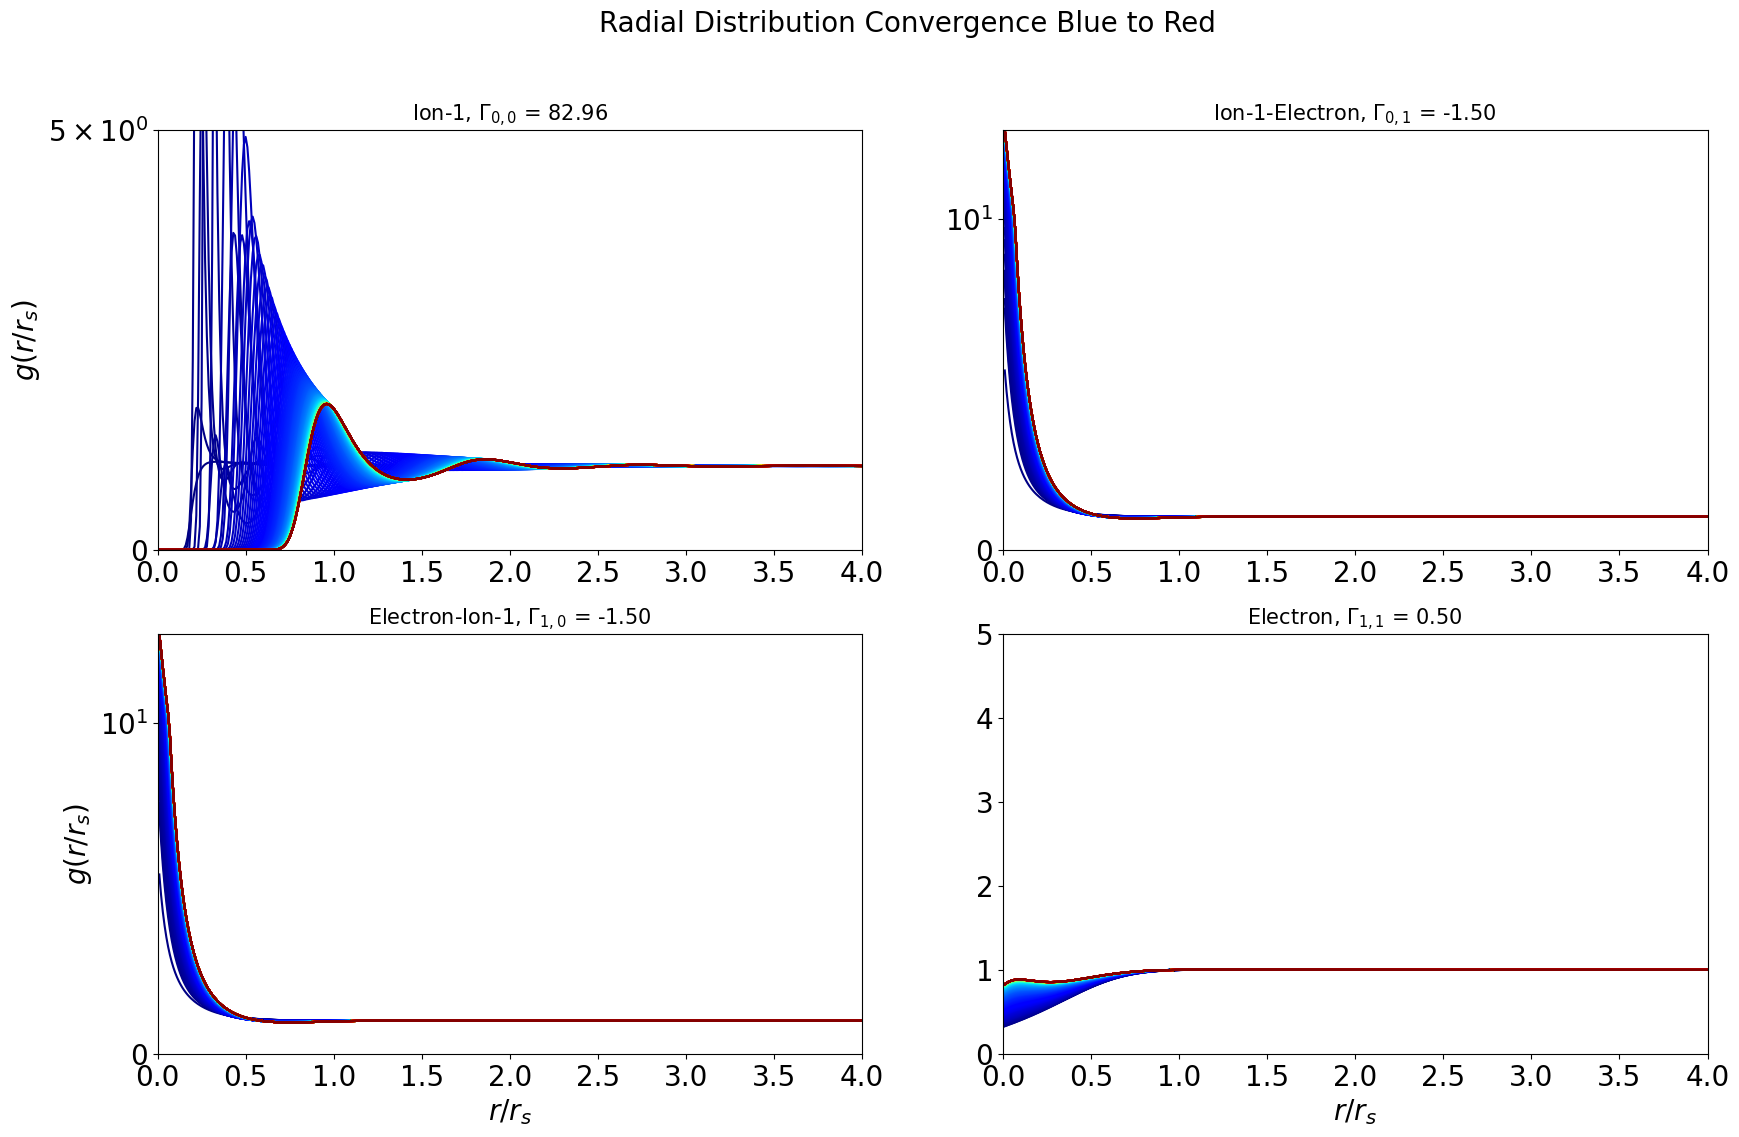

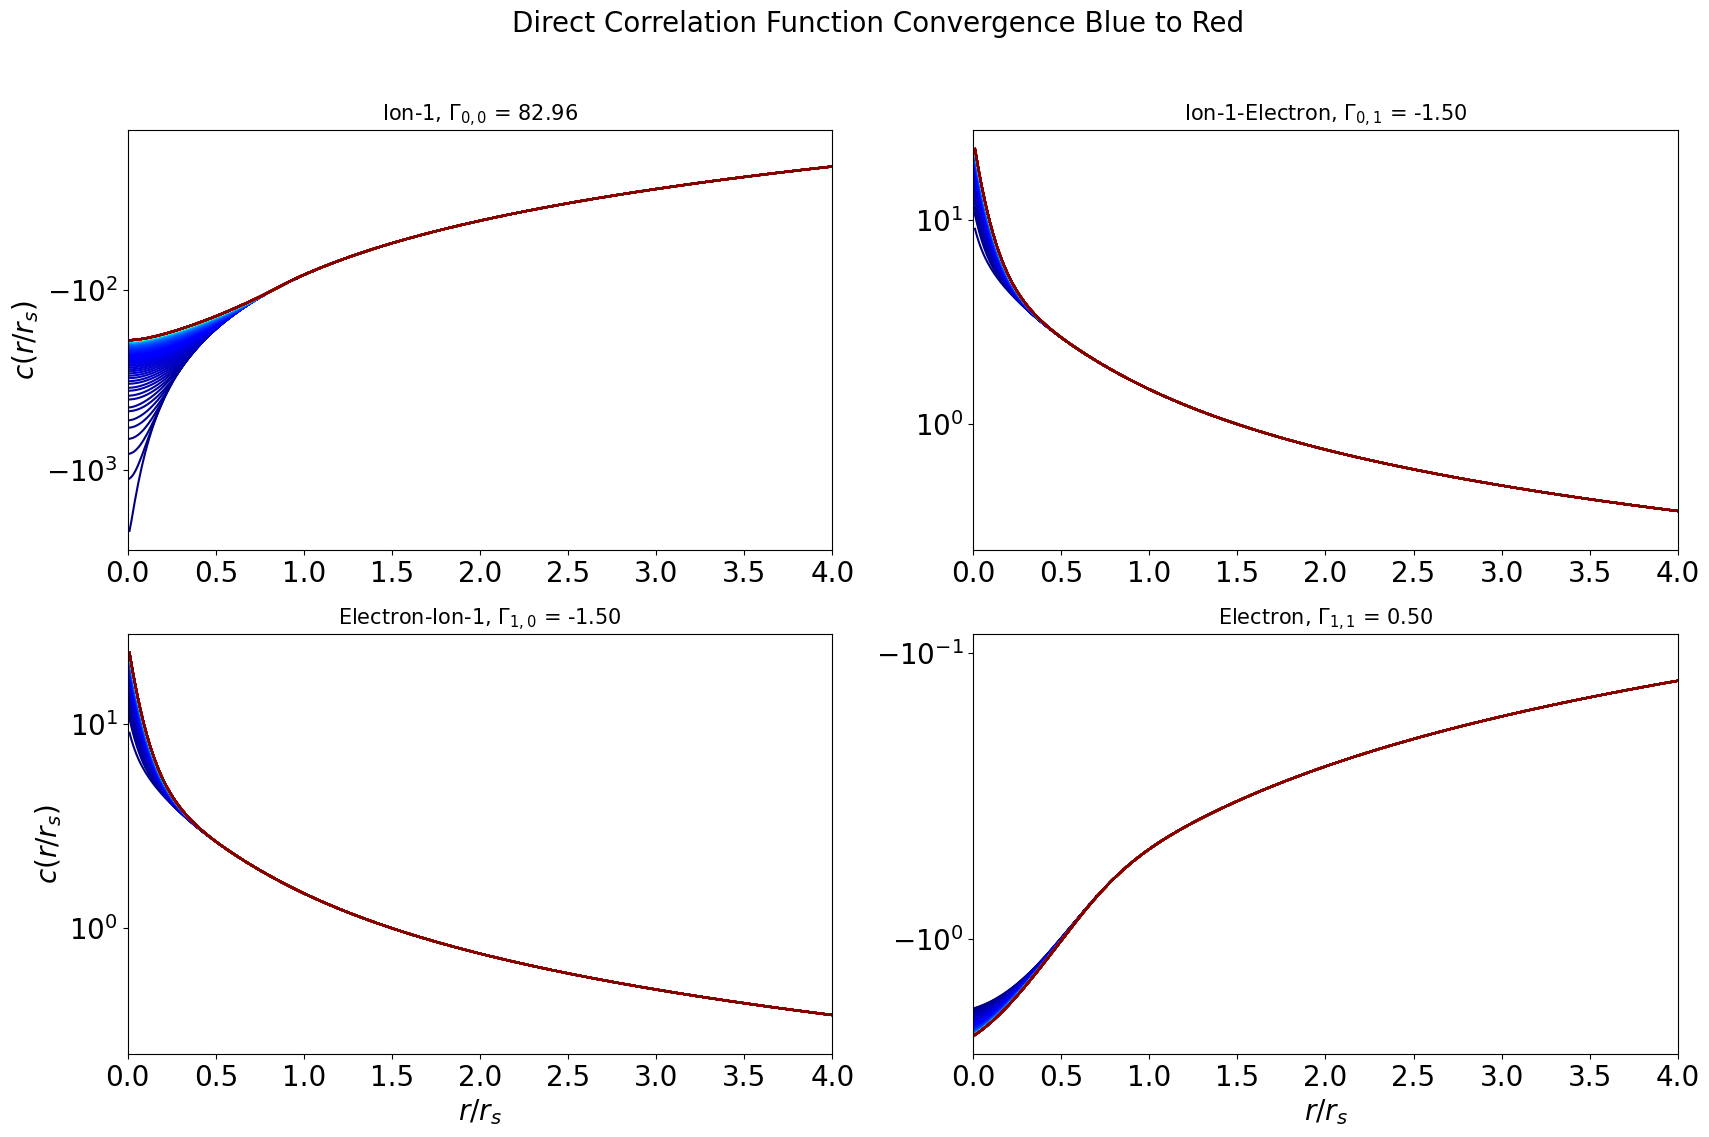

In [6]:
carbon.plot_species_convergence_g(n_slices= int(len(carbon.h_list)/1)  )
carbon.plot_species_convergence_c(n_slices= int(len(carbon.h_list)/1)  )

In [7]:
carbon_one_species, _ = run_hnc_one_species(ni, Te, Z, A, Zstar, method='best' )

Λee = 0.328
Λei = 0.232
Γii=82.957, Γie=-1.500, Γee=0.500 
r_i=1.476
r_e=1.023
θ  =4.18e-02
 HNC min: [1.] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
0: Err in c_r: 3.61e+02, OZ: 9.64e-11, HNC: 2.28e-12
 HNC min: [1.] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
1: Err in c_r: 5.74e+01, OZ: 8.50e-11, HNC: 1.06e-12
 HNC min: [1.] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
2: Err in c_r: 2.17e+01, OZ: 8.28e-11, HNC: 4.06e-11
 HNC min: [1.] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
3: Err in c_r: 1.22e+01, OZ: 8.34e-11, HNC: 9.64e-11
 HNC min: [1.] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
4: Err in c_r: 8.31e+00, OZ: 7.87e-11, HNC: 6.10e-11
 HNC min: [1.] True Optimization terminated successfully.
 OZ m

 HNC min: [1.] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
56: Err in c_r: 6.97e-02, OZ: 5.95e-12, HNC: 2.00e-13
 HNC min: [1.] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
57: Err in c_r: 6.56e-02, OZ: 5.62e-12, HNC: 1.88e-13
 HNC min: [1.] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
58: Err in c_r: 6.17e-02, OZ: 5.31e-12, HNC: 1.78e-13
 HNC min: [1.] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
59: Err in c_r: 5.81e-02, OZ: 5.02e-12, HNC: 1.67e-13
 HNC min: [1.] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
60: Err in c_r: 5.47e-02, OZ: 4.75e-12, HNC: 1.57e-13
 HNC min: [1.] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
61: Err in c_r: 5.15e-02, OZ: 4.49

 HNC min: [1.] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
115: Err in c_r: 2.31e-03, OZ: 2.11e-13, HNC: 7.12e-15
 HNC min: [1.] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
116: Err in c_r: 2.18e-03, OZ: 1.96e-13, HNC: 6.60e-15
 HNC min: [1.] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
117: Err in c_r: 2.06e-03, OZ: 1.86e-13, HNC: 5.93e-15
 HNC min: [1.] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
118: Err in c_r: 1.95e-03, OZ: 1.74e-13, HNC: 5.92e-15
 HNC min: [1.] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
119: Err in c_r: 1.84e-03, OZ: 1.65e-13, HNC: 5.72e-15
 HNC min: [1.] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
120: Err in c_r: 1.74e-03, OZ

 HNC min: [1.] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
173: Err in c_r: 8.75e-05, OZ: 4.81e-15, HNC: 2.35e-15
 HNC min: [1.] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
174: Err in c_r: 8.27e-05, OZ: 6.43e-15, HNC: 2.34e-15
 HNC min: [1.] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
175: Err in c_r: 7.82e-05, OZ: 6.47e-15, HNC: 2.59e-15
 HNC min: [1.] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
176: Err in c_r: 7.39e-05, OZ: 2.65e-15, HNC: 2.37e-15
 HNC min: [1.] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
177: Err in c_r: 6.98e-05, OZ: 6.77e-15, HNC: 2.36e-15
 HNC min: [1.] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
178: Err in c_r: 6.60e-05, OZ

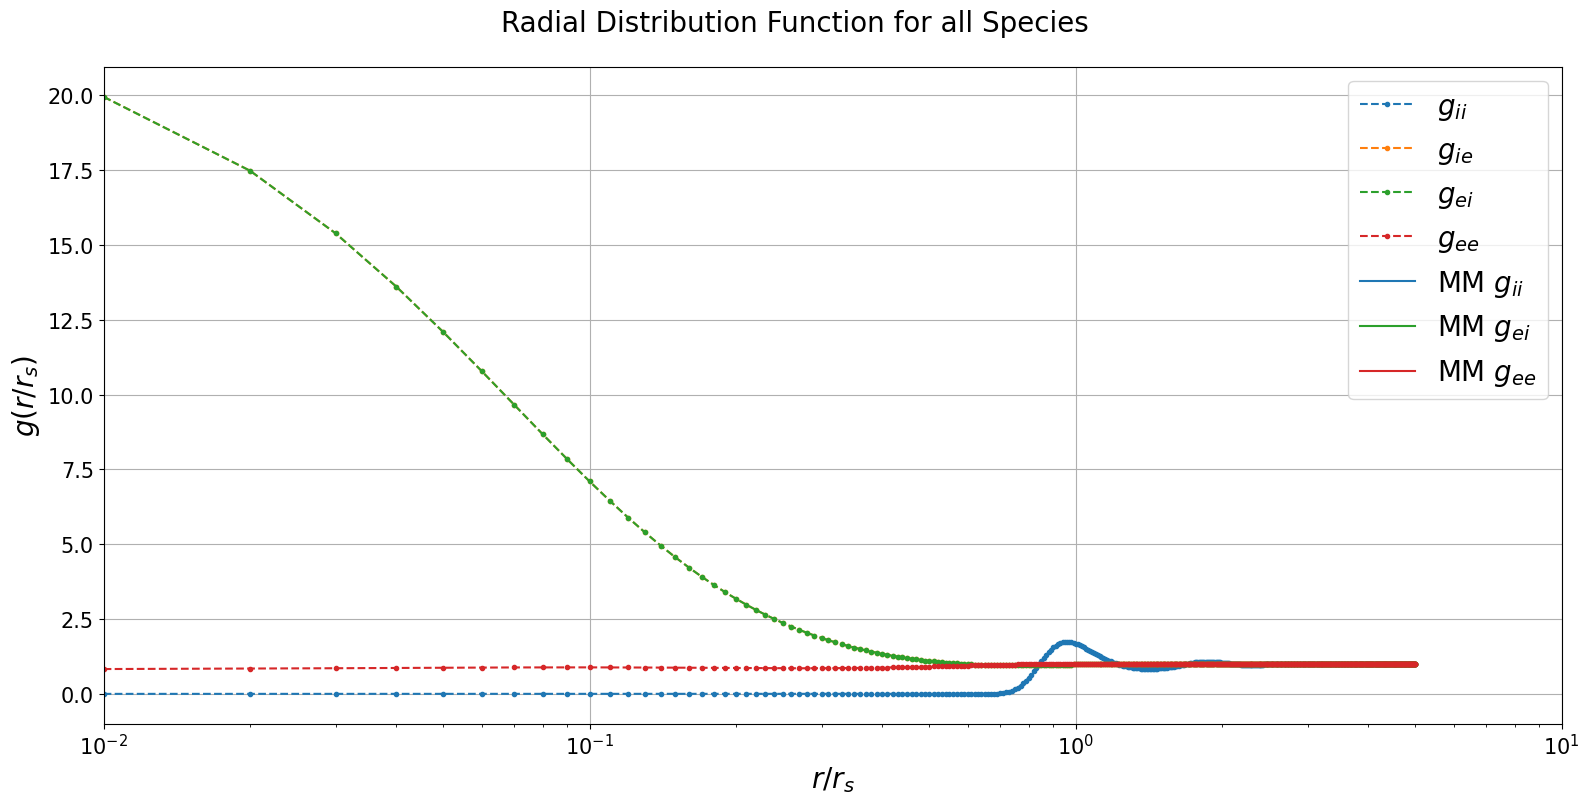

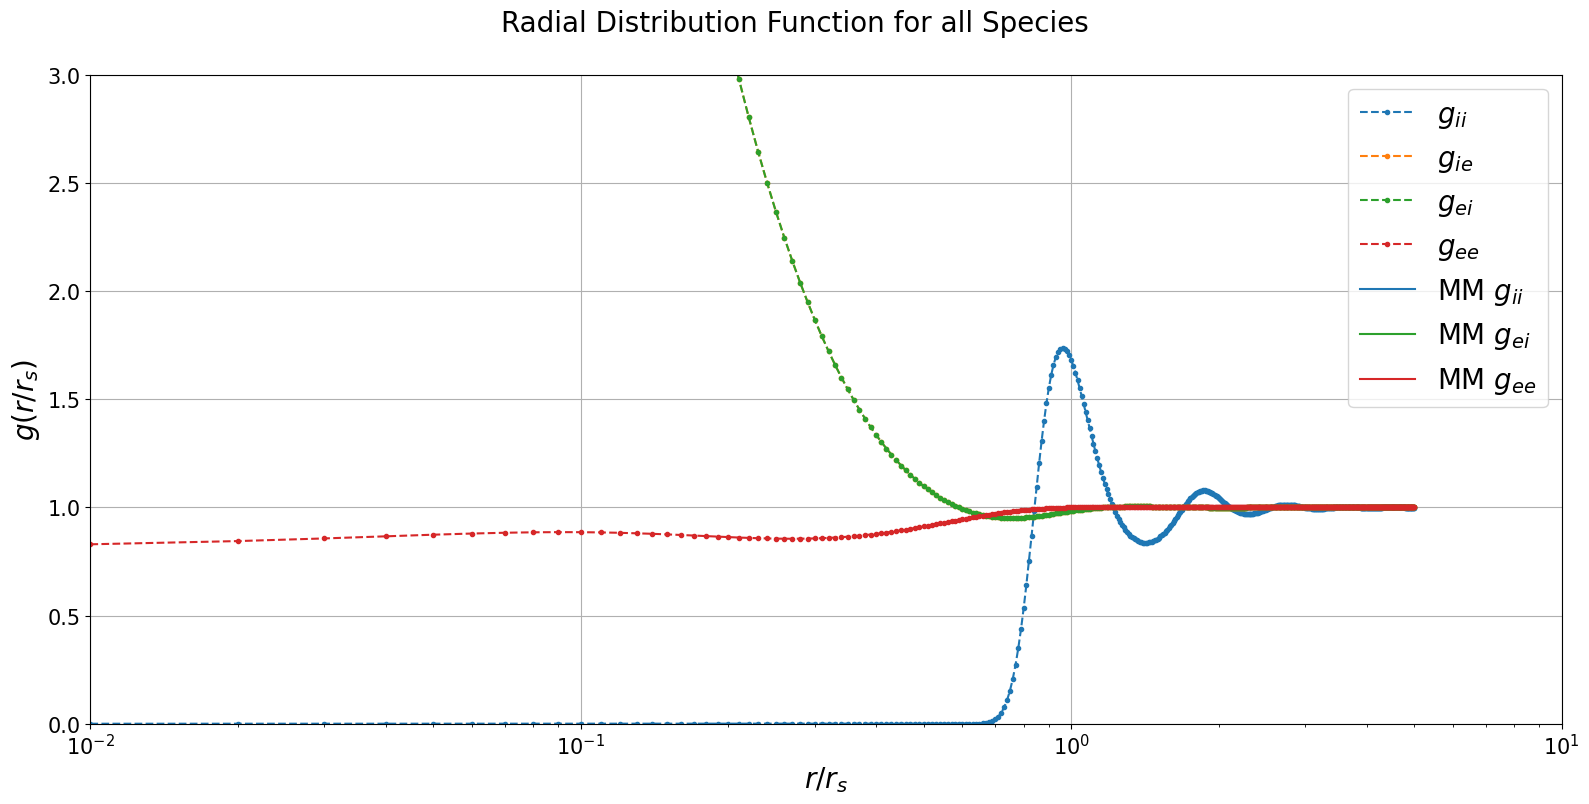

In [8]:
carbon.plot_g_vs_murillo()
carbon.plot_g_vs_murillo(gmax=3)

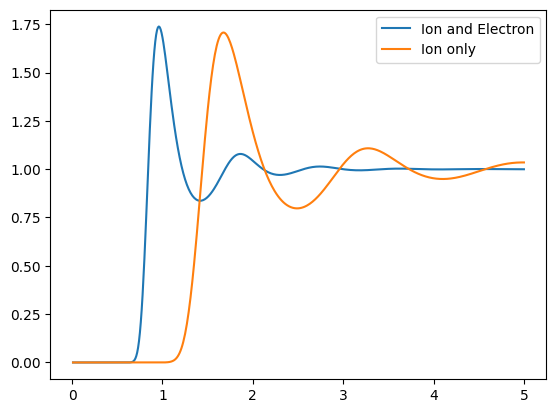

In [9]:
fig, ax = plt.subplots()

ax.plot(carbon.r_array, carbon.h_r_matrix[0,0]+1, label='Ion and Electron')
ax.plot(carbon.r_array, carbon_one_species.h_r_matrix[0,0]+1, label="Ion only")
ax.legend()



In [10]:
Zstar*np.sum(carbon.del_k*carbon.k_array**2*(carbon.h_r_matrix[0,0]+1))  - Zstar*np.sum(carbon.del_k*carbon.k_array**2*(carbon.h_r_matrix[0,1]+1))

-68736.46386738494

In [11]:
-1895796.408371091

-1895796.408371091

## Copper

In [12]:
ni = 8.49e22 # per cc
Te = 1*eV 
Ti   = 1*eV 
Z, A = 29,63.55
Zstar= 1.206
# c_s_r_guess = np.zeros((2,2,N_bins))
# c_s_r_guess[0,0] = carbon_one_species.c_s_r_matrix


copper,_ = run_hnc(ni, Te, Z, A, Zstar ,num_iterations=1e3, method='best')#, c_s_r_guess=c_s_r_guess)

Λee = 0.417
Λei = 0.296
Γii=14.837, Γie=-1.770, Γee=1.460 
r_i=2.667
r_e=2.506
θ  =1.25e-01
 HNC min: [1.] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
0: Err in c_r: 3.32e+01, OZ: 9.90e-12, HNC: 2.14e-10
 HNC min: [1.] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
1: Err in c_r: 4.72e+00, OZ: 8.25e-12, HNC: 3.85e-11
 HNC min: [1.] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
2: Err in c_r: 1.69e+00, OZ: 7.47e-12, HNC: 7.18e-11
 HNC min: [1.] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
3: Err in c_r: 9.01e-01, OZ: 6.69e-12, HNC: 2.79e-11
 HNC min: [1.] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
4: Err in c_r: 5.85e-01, OZ: 5.85e-12, HNC: 3.90e-11
 HNC min: [1.] True Optimization terminated successfully.
 OZ m

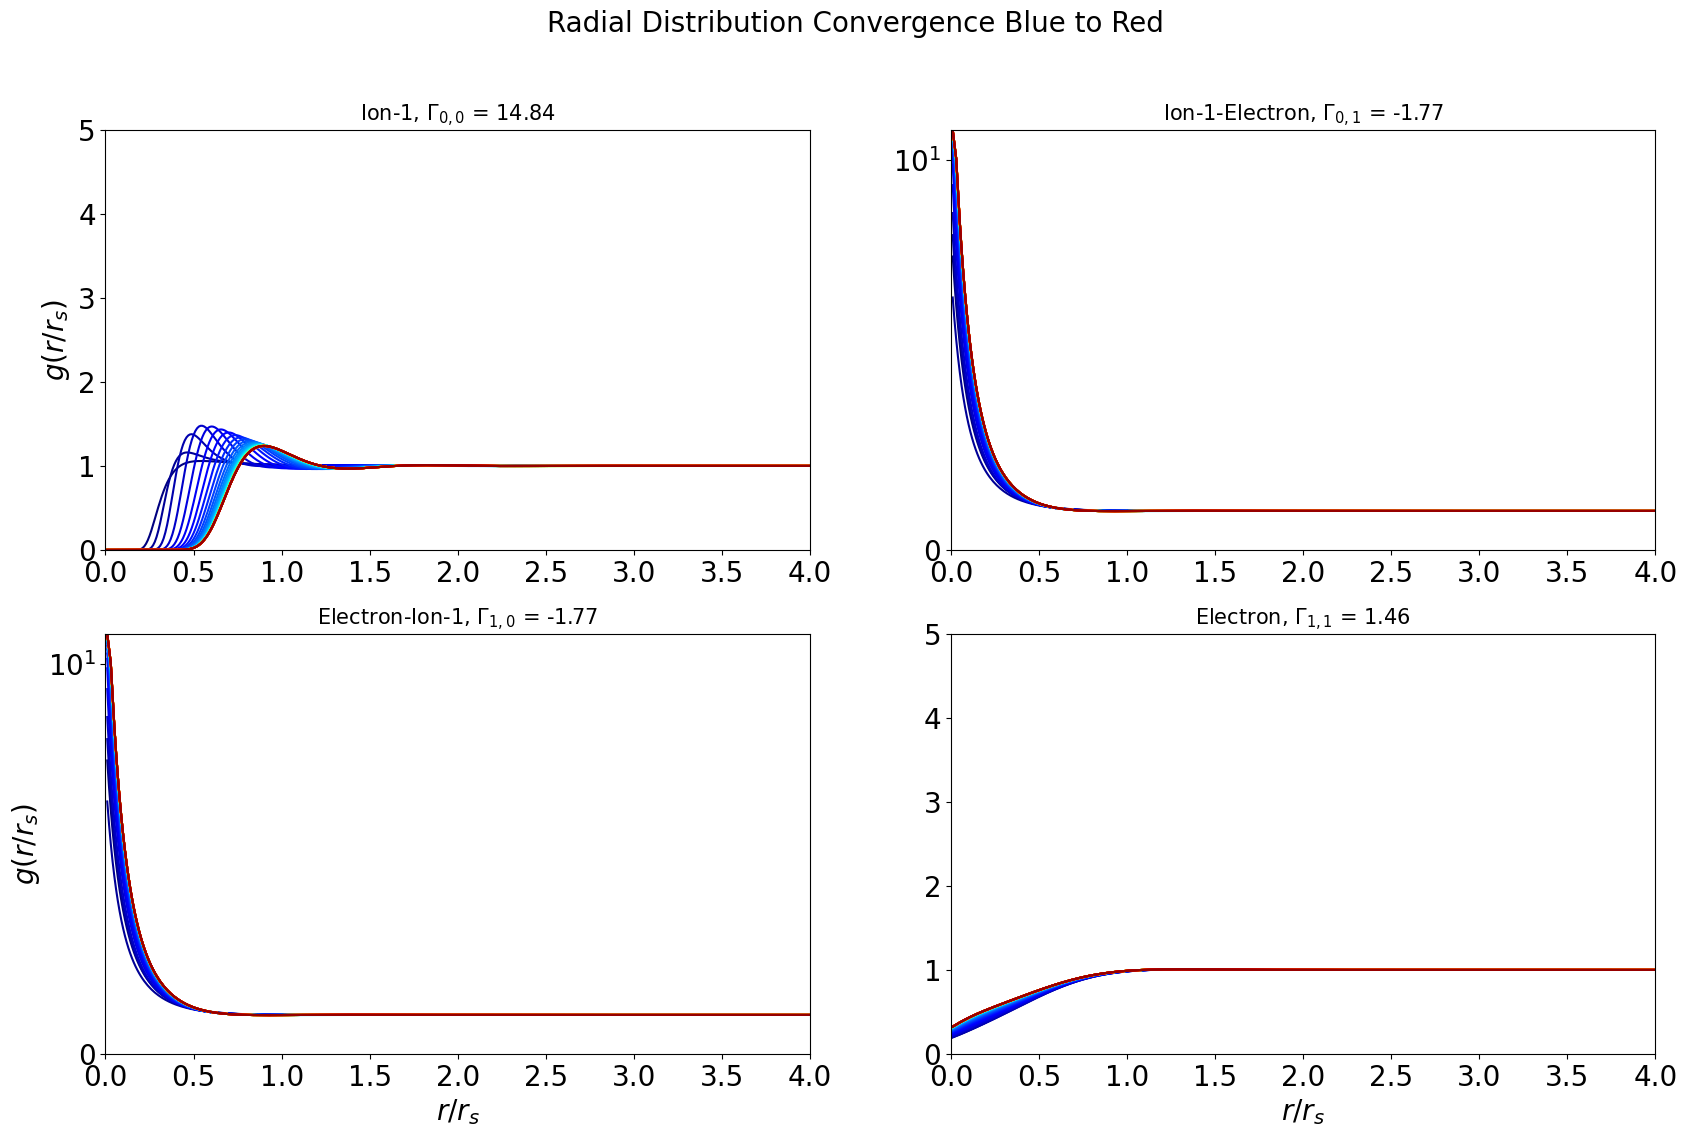

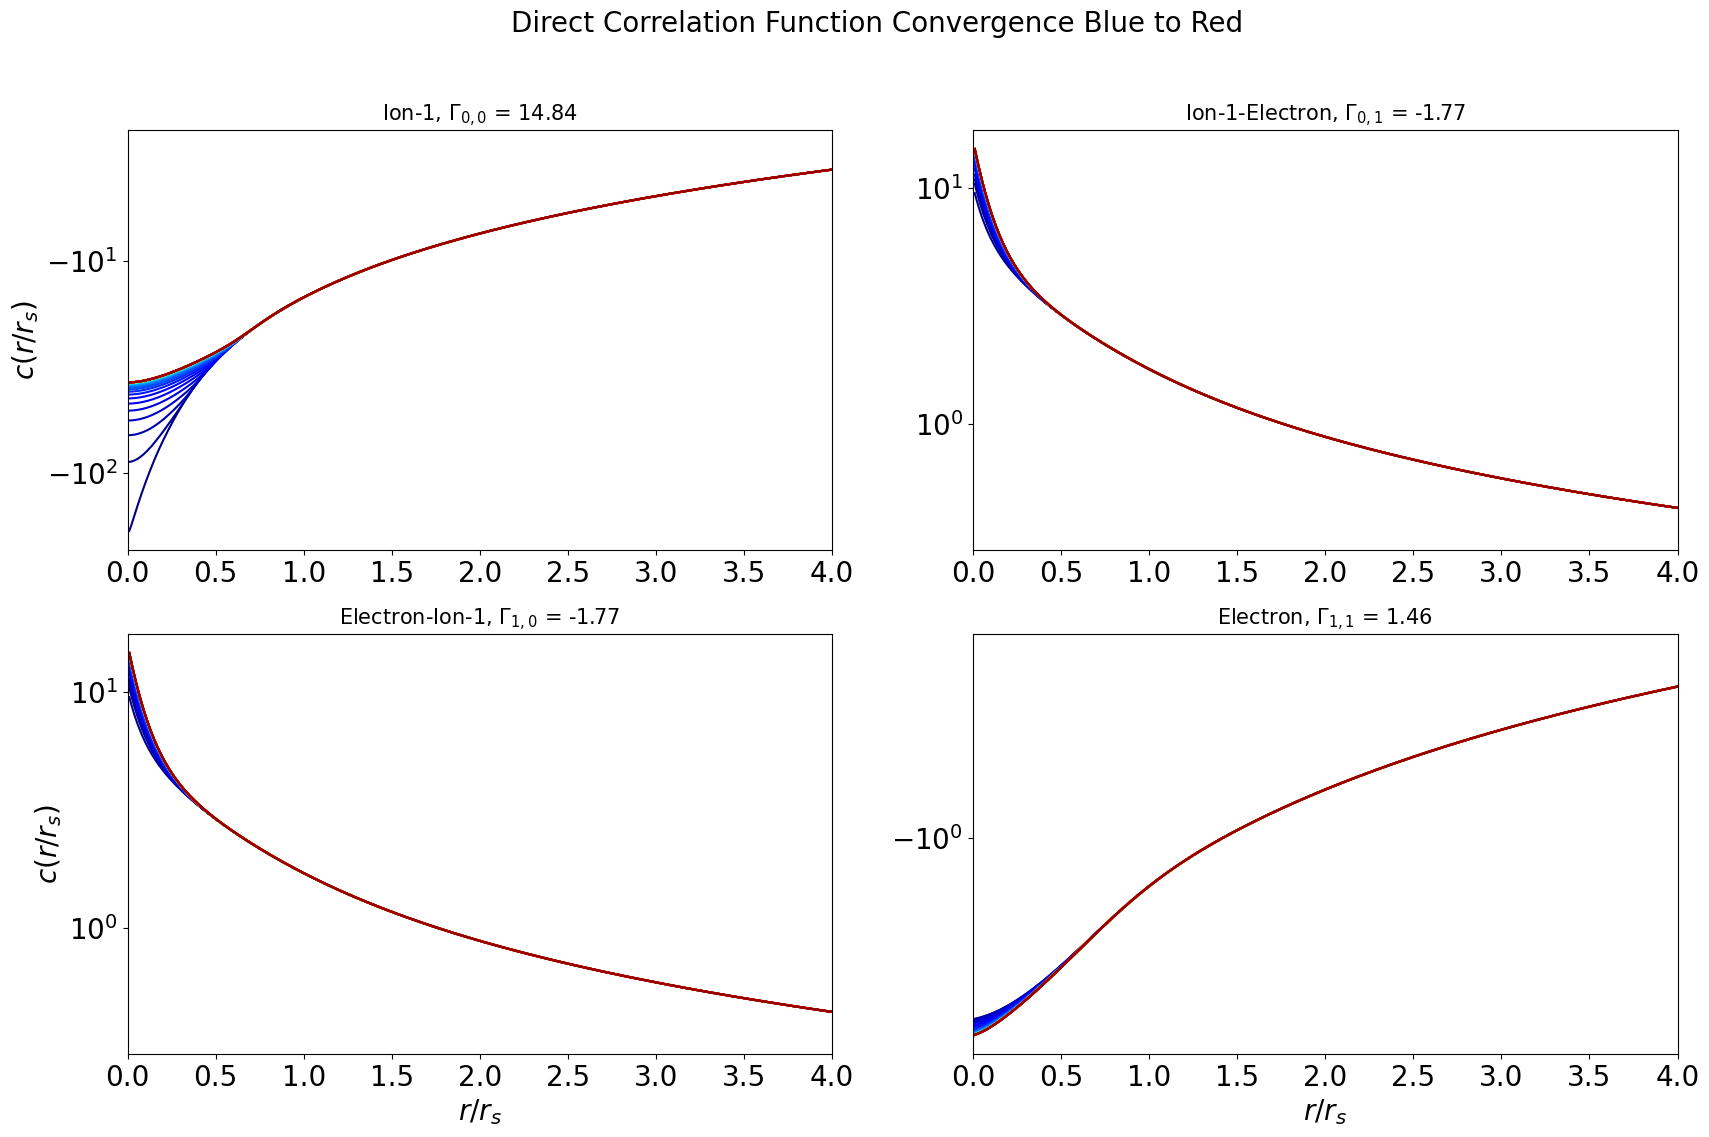

In [13]:
copper.plot_species_convergence_g(n_slices= int(len(copper.h_list)/1)  )
copper.plot_species_convergence_c(n_slices= int(len(copper.h_list)/1)  )

In [14]:
copper_one_species,_ = run_hnc_one_species(ni, Te, Z, A, Zstar )

Λee = 0.417
Λei = 0.296
Γii=14.837, Γie=-1.770, Γee=1.460 
r_i=2.667
r_e=2.506
θ  =1.25e-01
 HNC min: [1.] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
0: Err in c_r: 7.38e+01, OZ: 5.55e-11, HNC: 3.33e-12
 HNC min: [1.] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
1: Err in c_r: 6.83e+00, OZ: 4.56e-11, HNC: 2.22e-12
 HNC min: [1.] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
2: Err in c_r: 2.33e+00, OZ: 3.98e-11, HNC: 2.39e-12
 HNC min: [1.] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
3: Err in c_r: 1.25e+00, OZ: 3.47e-11, HNC: 2.47e-12
 HNC min: [1.] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
4: Err in c_r: 8.02e-01, OZ: 2.95e-11, HNC: 2.26e-12
 HNC min: [1.] True Optimization terminated successfully.
 OZ m

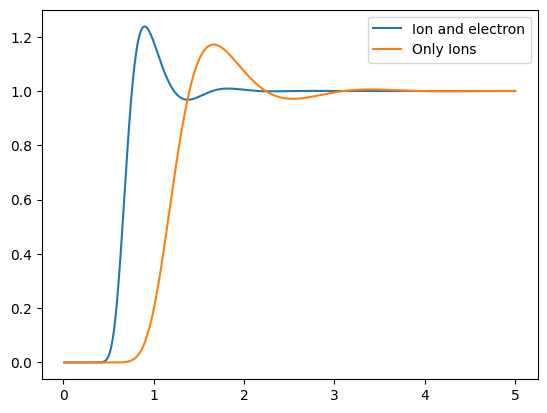

In [15]:
fig, ax = plt.subplots()

ax.plot(copper.r_array, copper.h_r_matrix[0,0]+1, label='Ion and electron')
ax.plot(copper.r_array, copper_one_species.h_r_matrix[0,0]+1, label="Only Ions")
ax.legend()



## Hydrogen

In [16]:
ni = 5.98e23 # per cc
Te = 2*eV 
Ti   = 2*eV 
Z, A = 1,1
Zstar= 1
hydrogen, _ = run_hnc(ni, Te, Z, A, Zstar )

Λee = 0.465
Λei = 0.329
Γii=9.778, Γie=-0.946, Γee=0.944 
r_i=1.391
r_e=1.391
θ  =7.73e-02
 HNC min: [1.] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
0: Err in c_r: 2.27e+01, OZ: 8.49e-12, HNC: 2.25e-11
 HNC min: [1.] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
1: Err in c_r: 2.81e+00, OZ: 6.88e-12, HNC: 8.86e-13
 HNC min: [1.] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
2: Err in c_r: 9.63e-01, OZ: 5.94e-12, HNC: 3.03e-12
 HNC min: [1.] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
3: Err in c_r: 5.09e-01, OZ: 5.07e-12, HNC: 2.18e-12
 HNC min: [1.] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
4: Err in c_r: 3.22e-01, OZ: 4.20e-12, HNC: 1.87e-12
 HNC min: [1.] True Optimization terminated successfully.
 OZ mi

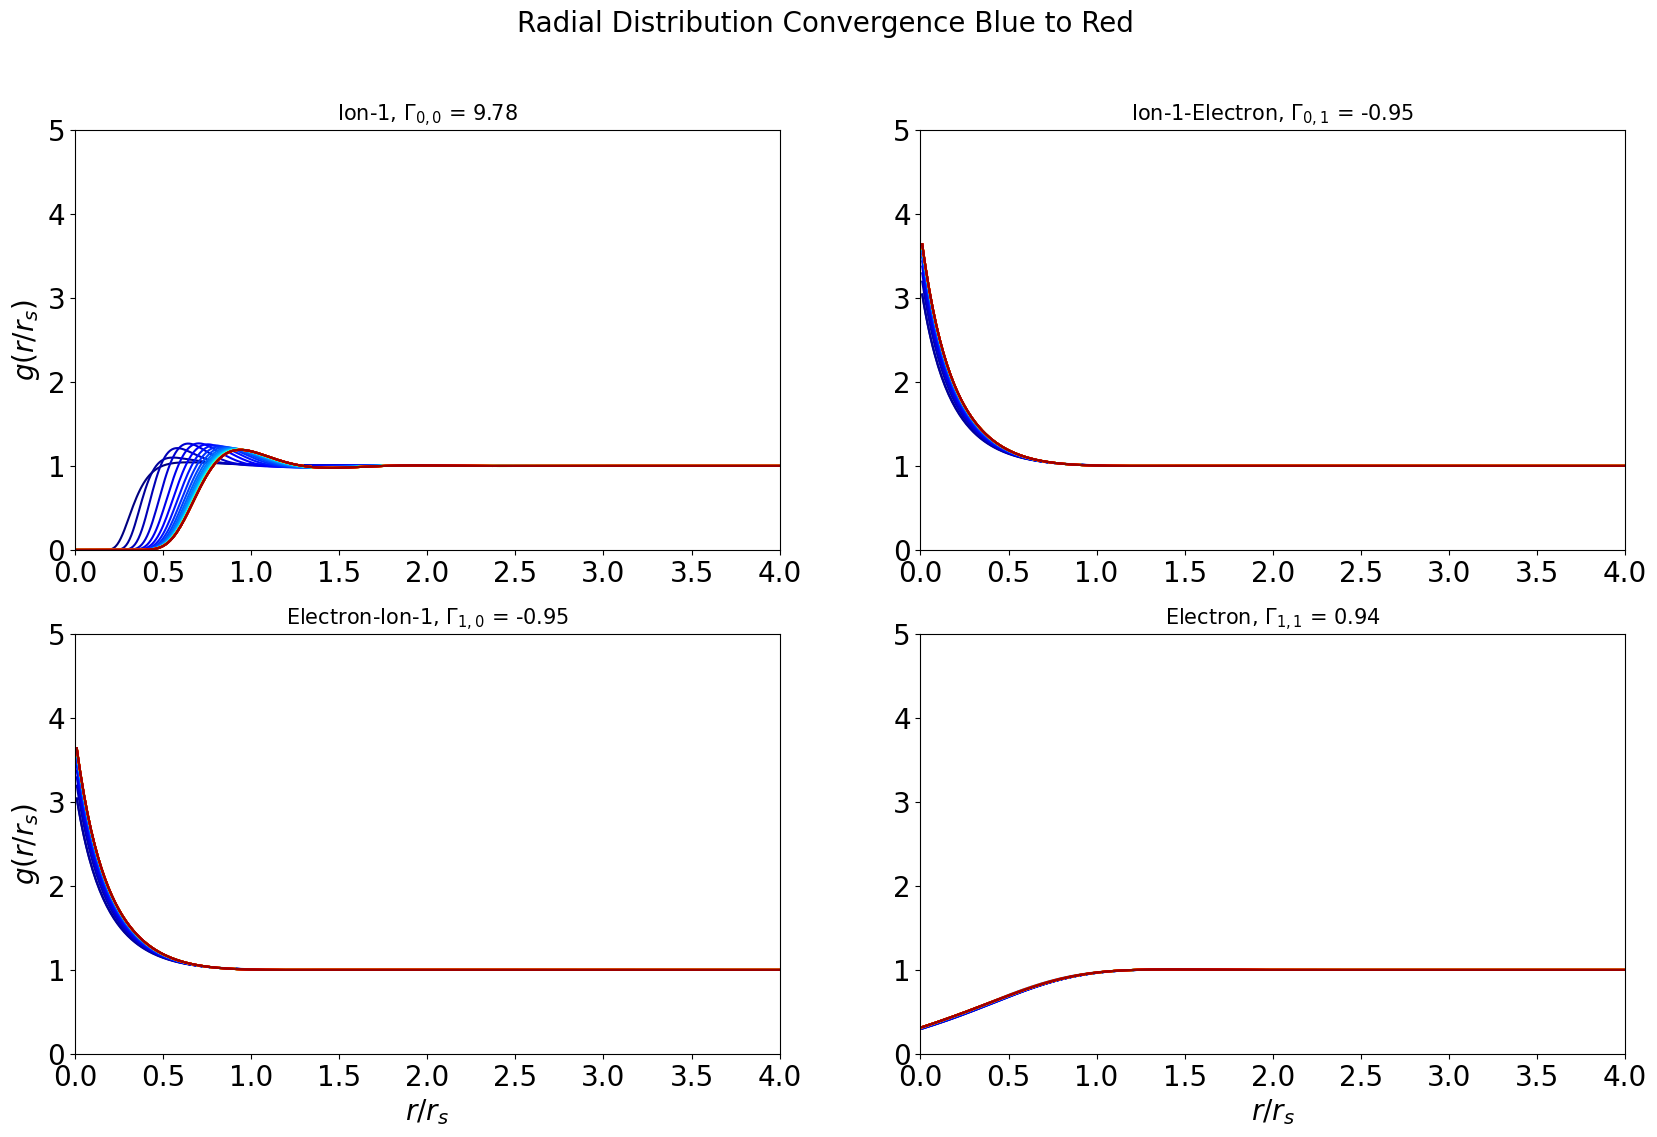

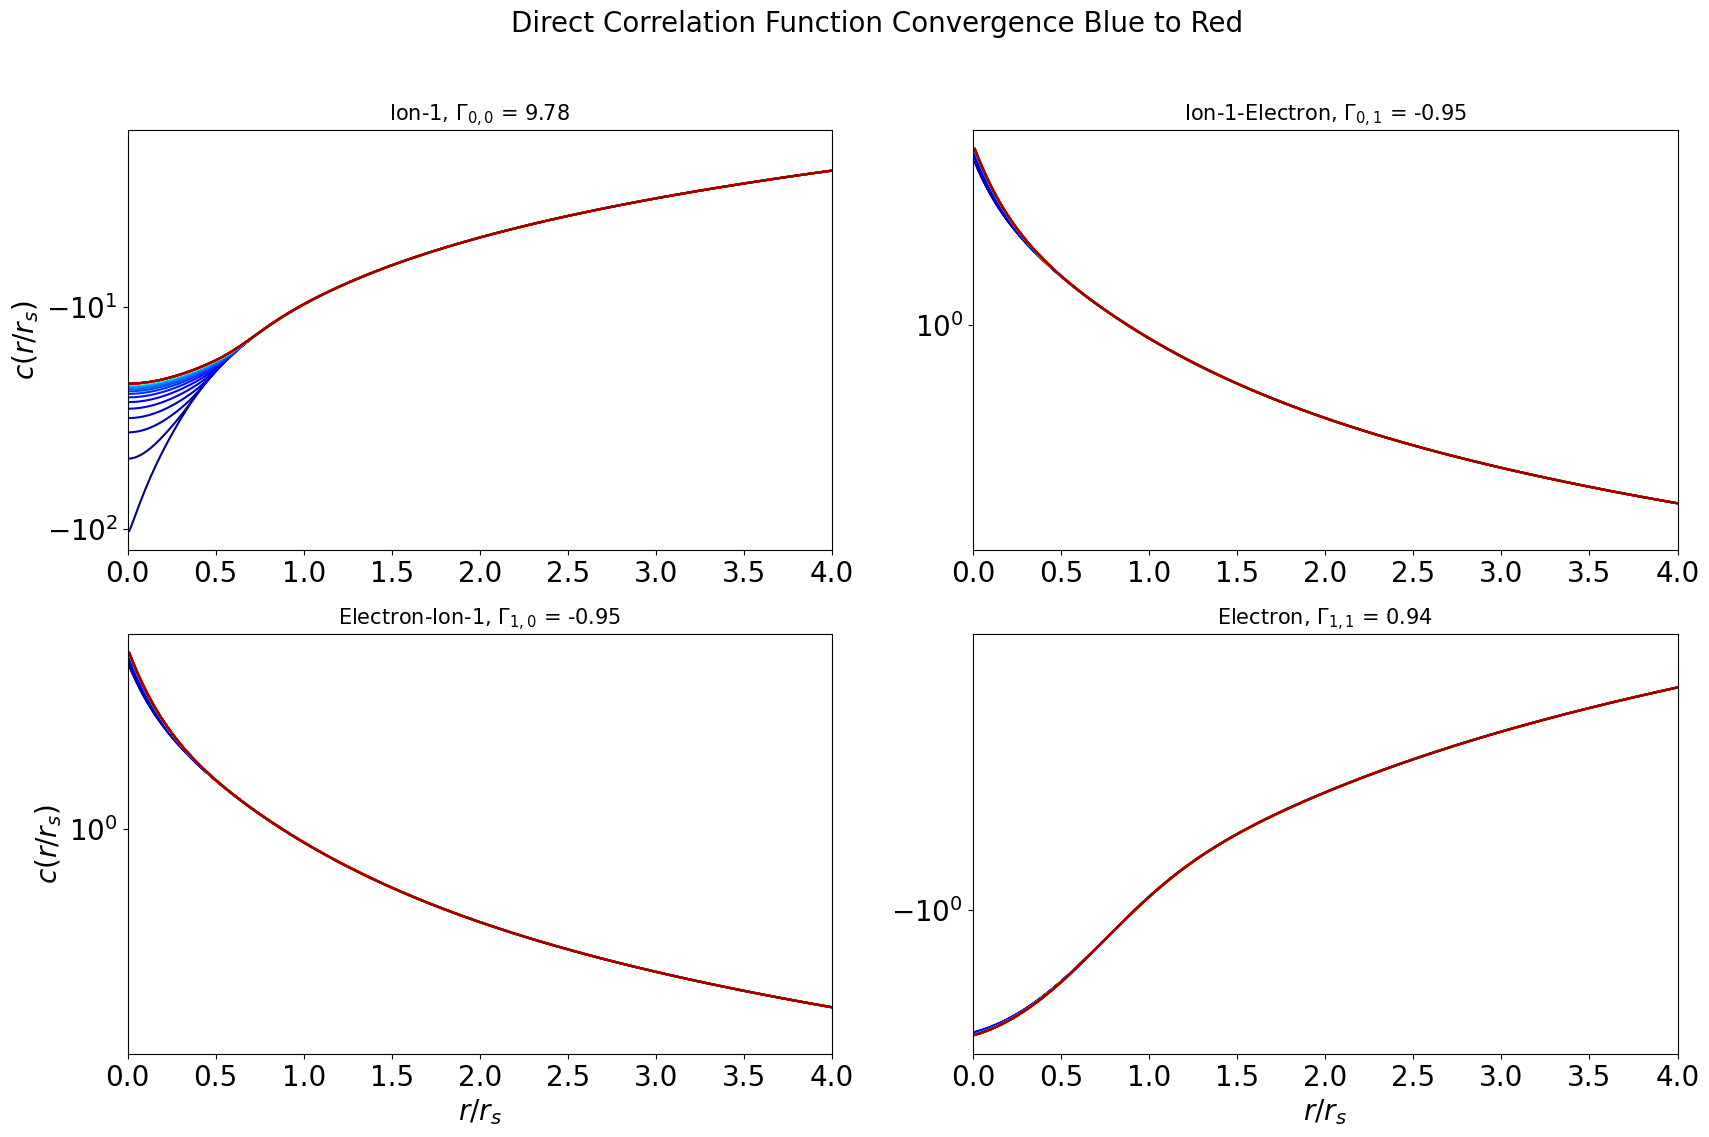

In [17]:
hydrogen.plot_species_convergence_g(n_slices= int(len(hydrogen.h_list)/1)  )
hydrogen.plot_species_convergence_c(n_slices= int(len(hydrogen.h_list)/1)  )

In [18]:
hydrogen_one_species,_ = run_hnc_one_species(ni, Te, Z, A, Zstar )

Λee = 0.465
Λei = 0.329
Γii=9.778, Γie=-0.946, Γee=0.944 
r_i=1.391
r_e=1.391
θ  =7.73e-02
 HNC min: [1.] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
0: Err in c_r: 4.96e+01, OZ: 4.67e-11, HNC: 3.62e-12
 HNC min: [1.] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
1: Err in c_r: 3.98e+00, OZ: 3.65e-11, HNC: 2.49e-12
 HNC min: [1.] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
2: Err in c_r: 1.30e+00, OZ: 2.97e-11, HNC: 2.49e-12
 HNC min: [1.] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
3: Err in c_r: 6.72e-01, OZ: 2.39e-11, HNC: 2.30e-12
 HNC min: [1.] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
4: Err in c_r: 4.14e-01, OZ: 1.87e-11, HNC: 1.87e-12
 HNC min: [1.] True Optimization terminated successfully.
 OZ mi

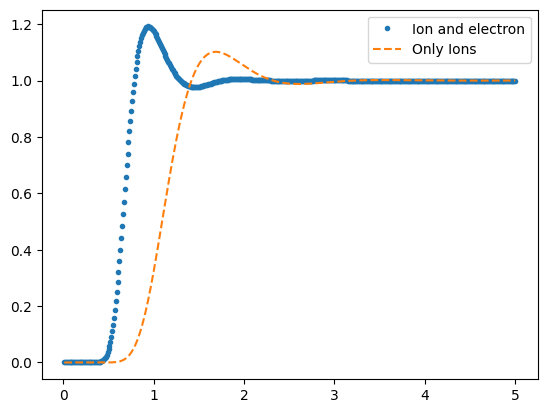

In [19]:
fig, ax = plt.subplots()

ax.plot(hydrogen.r_array, hydrogen.h_r_matrix[0,0]+1,'.', label='Ion and electron')
ax.plot(hydrogen.r_array, hydrogen_one_species.h_r_matrix[0,0]+1, '--',label="Only Ions")
ax.legend()

## Aluminum

In [126]:
ni = 6.03e22 # per cc
Te = 20*eV 
Ti   = 20*eV 
Z, A = 13,27
Zstar= 3
aluminum_i_one_species, _ = run_hnc_one_species(ni, Te, Z, A, Zstar, num_iterations=1e3 )
# aluminum_e_one_species, _ = run_hnc_one_species(Zstar*ni, Te, 1, m_e/m_p, 1, num_iterations=1e3 )


Λee = 0.209
Λei = 0.181
Γii=4.096, Γie=-1.847, Γee=0.409 
r_i=2.989
r_e=2.073
θ  =1.71e+00
 HNC min: [1.] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
0: Err in c_r: 2.15e+01, OZ: 2.99e-11, HNC: 4.21e-12
 HNC min: [1.] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
1: Err in c_r: 1.22e+00, OZ: 1.90e-11, HNC: 2.71e-12
 HNC min: [1.] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
2: Err in c_r: 3.41e-01, OZ: 1.20e-11, HNC: 2.03e-12
 HNC min: [1.] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
3: Err in c_r: 1.53e-01, OZ: 7.34e-12, HNC: 1.30e-12
 HNC min: [1.] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
4: Err in c_r: 7.86e-02, OZ: 4.33e-12, HNC: 7.69e-13
 HNC min: [1.] True Optimization terminated successfully.
 OZ mi

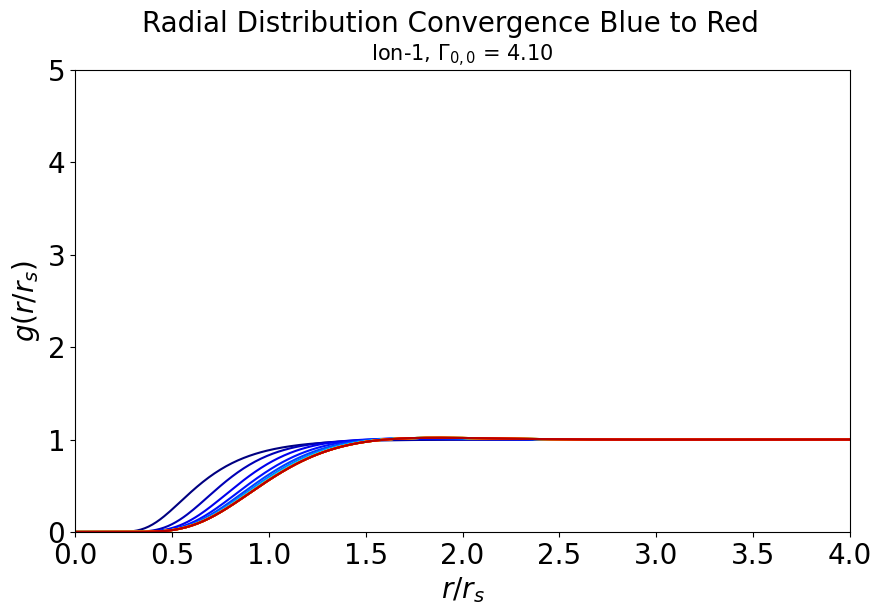

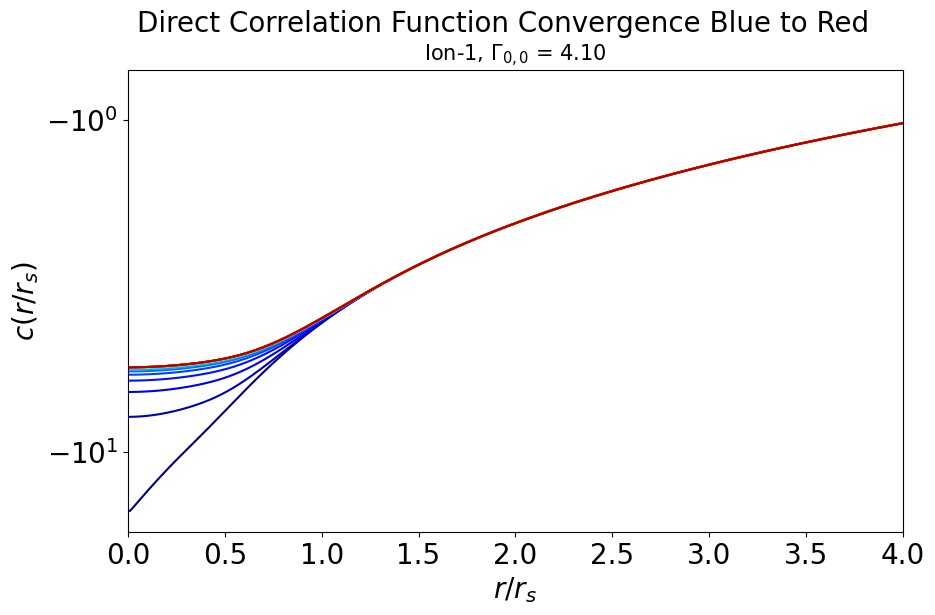

In [127]:
aluminum_i_one_species.plot_species_convergence_g(n_slices= int(len(aluminum_i_one_species.h_list)/1)  )
aluminum_i_one_species.plot_species_convergence_c(n_slices= int(len(aluminum_i_one_species.h_list)/1)  )

# aluminum_e_one_species.plot_species_convergence_g(n_slices= int(len(aluminum_i_one_species.h_list)/1)  )
# aluminum_e_one_species.plot_species_convergence_c(n_slices= int(len(aluminum_i_one_species.h_list)/1)  )

In [123]:
c_s_r_guess = np.zeros((2,2,N_bins))
c_s_r_guess[0,0] = aluminum_i_one_species.c_s_r_matrix
# c_s_r_guess[1,1] = aluminum_e_one_species.c_s_r_matrix

In [111]:
# c_s_r_guess = np.zeros((2,2,N_bins))
# c_s_r_guess[:,:] = aluminum.c_s_r_matrix[:,:]
# c_s_r_guess[1,1] = aluminum_e_one_species.c_s_r_matrix

In [135]:
aluminum, _ = run_hnc(ni, Te, Z, A, Zstar, method='fixed', num_iterations=1e4, alpha=1e-2)#, c_s_r_guess=c_s_r_guess )

Λee = 0.209
Λei = 0.181
Γii=4.096, Γie=-1.847, Γee=0.409 
r_i=2.989
r_e=2.073
θ  =1.71e+00
0: Err in c_r: 1.02e-01, OZ: 4.95e-02, HNC: 1.31e+15
1: Err in c_r: 1.01e-01, OZ: 4.93e-02, HNC: 3.84e+14
2: Err in c_r: 1.00e-01, OZ: 4.91e-02, HNC: 1.21e+14
3: Err in c_r: 9.91e-02, OZ: 4.89e-02, HNC: 4.11e+13
4: Err in c_r: 9.81e-02, OZ: 4.86e-02, HNC: 1.48e+13
5: Err in c_r: 9.72e-02, OZ: 4.84e-02, HNC: 5.69e+12
6: Err in c_r: 9.63e-02, OZ: 4.82e-02, HNC: 2.30e+12


KeyboardInterrupt: 

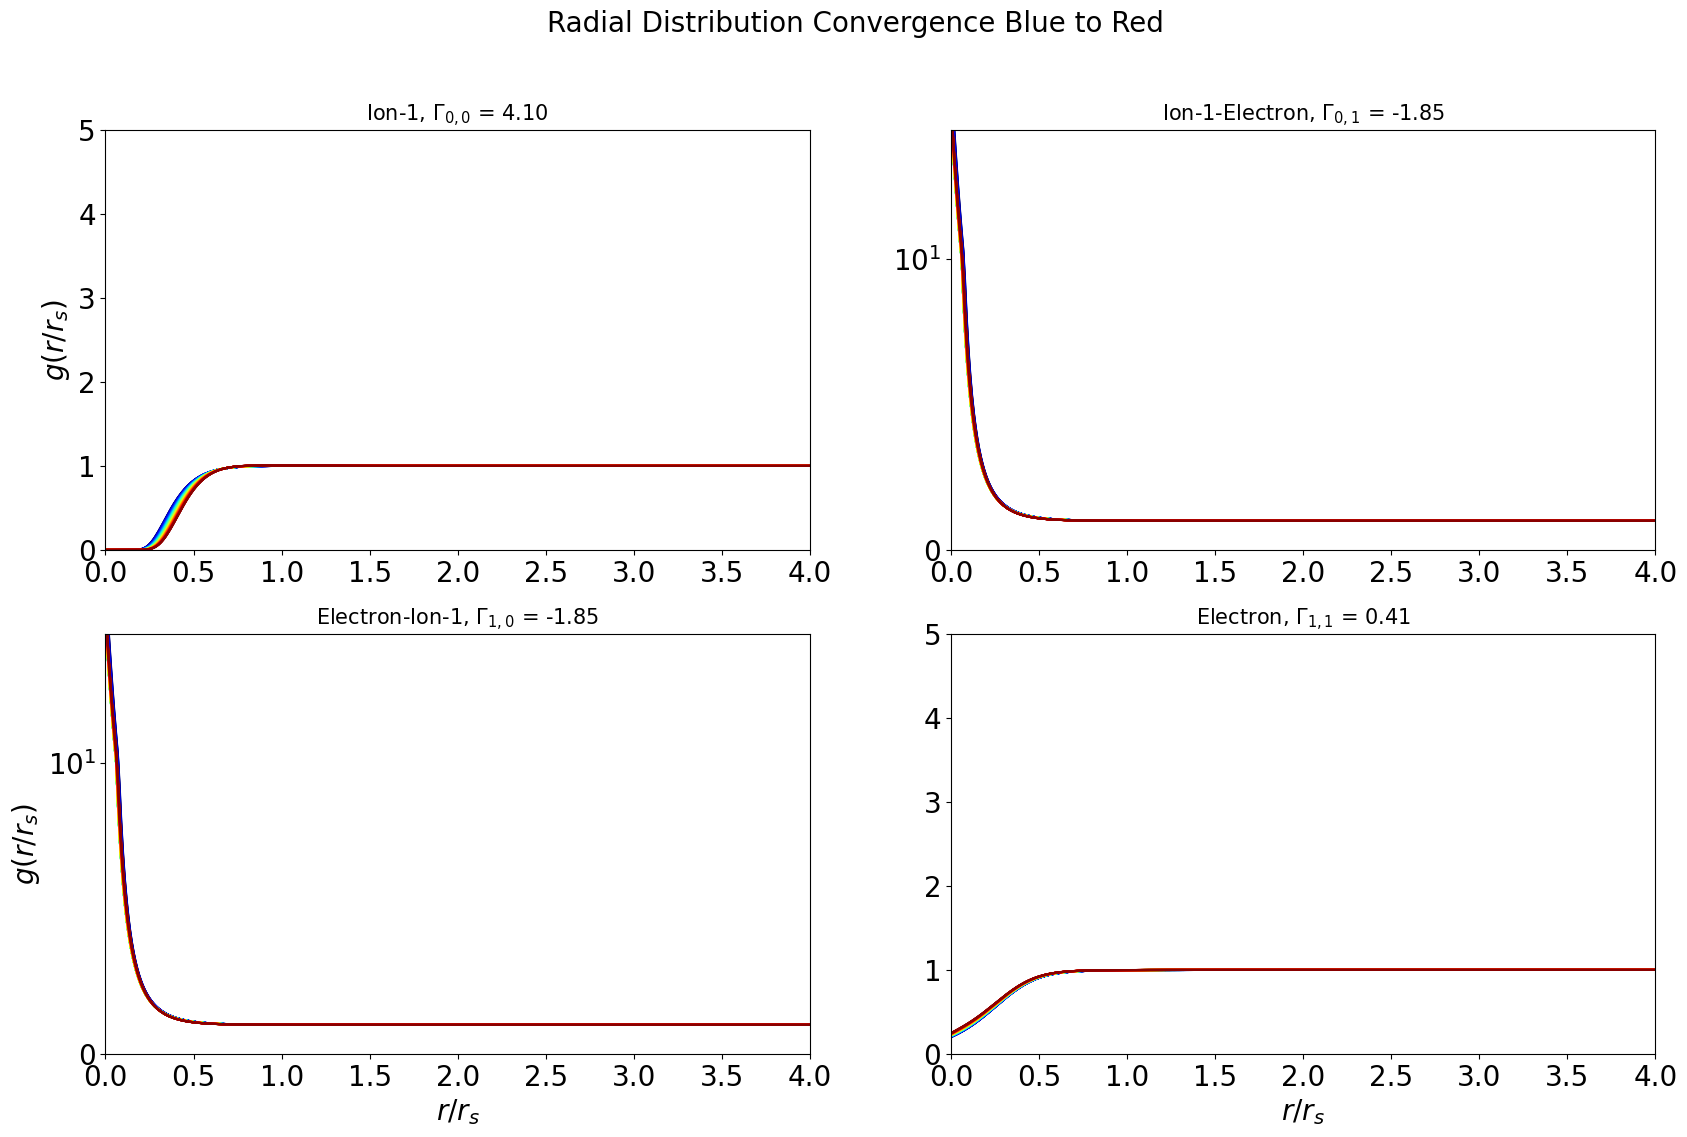

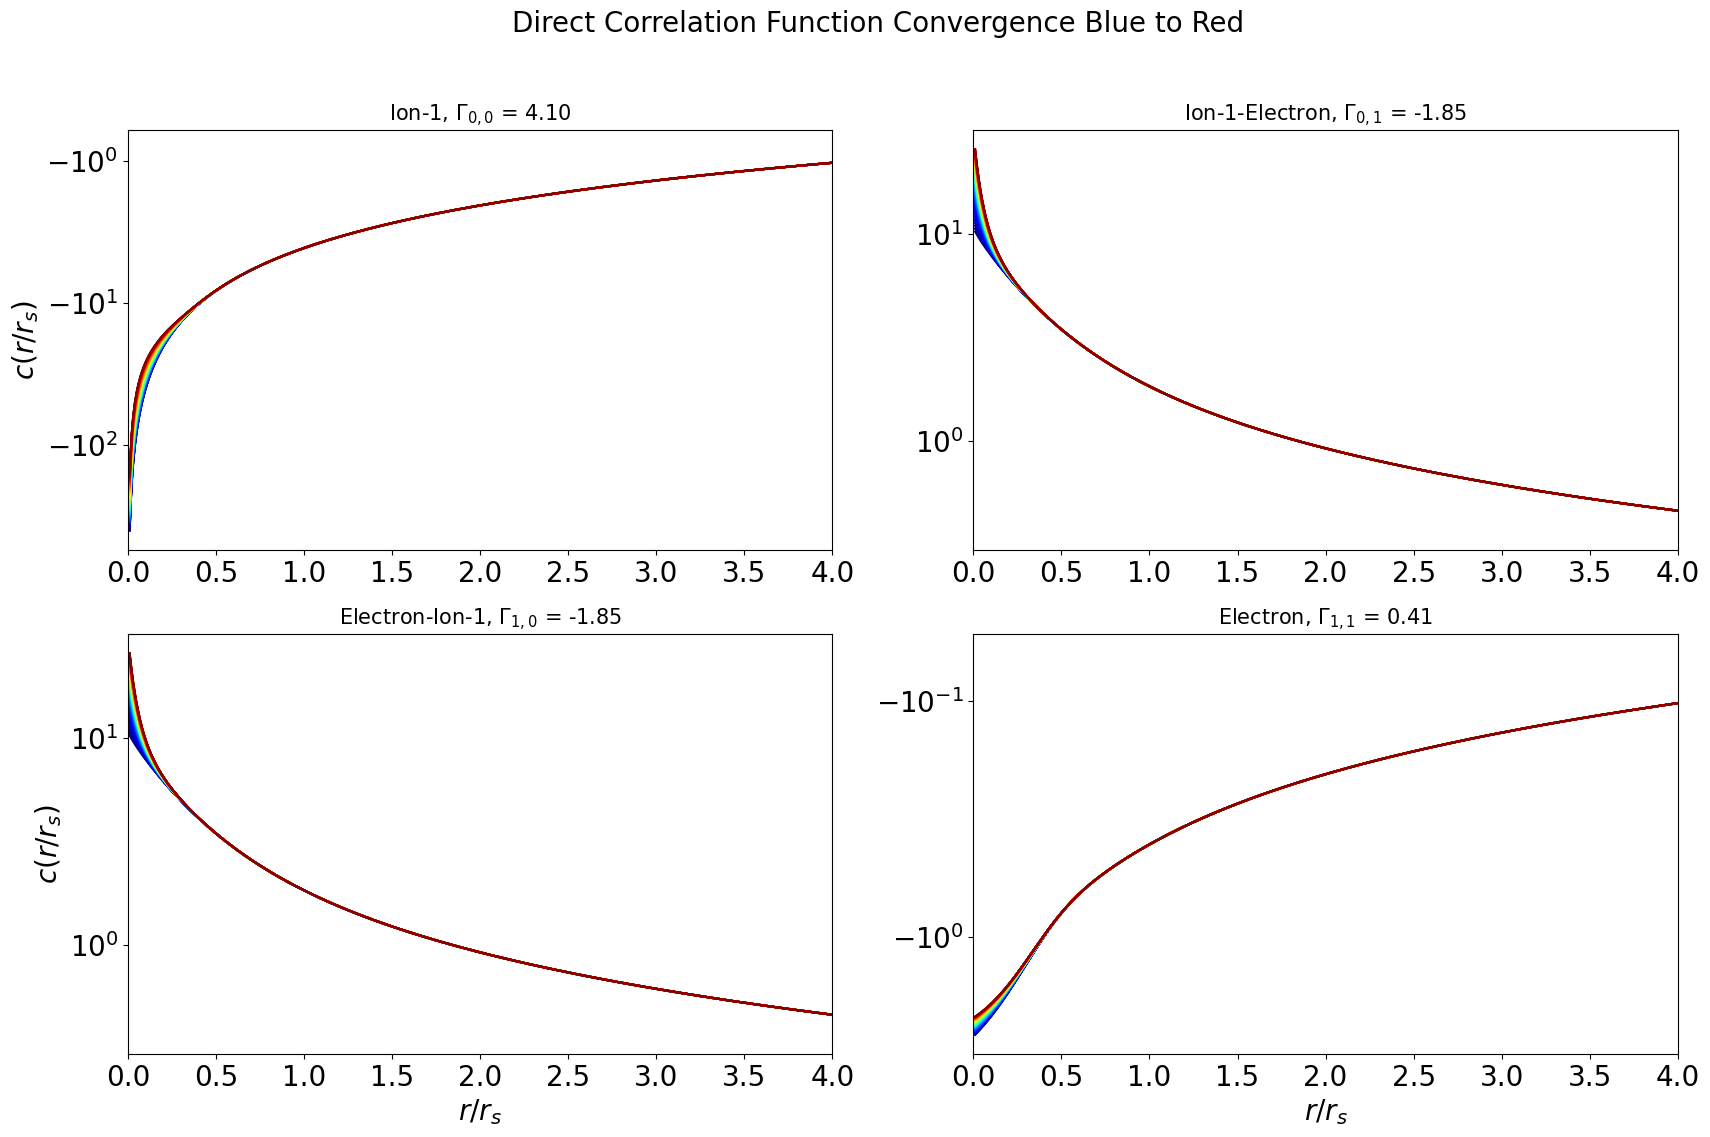

In [134]:
aluminum.plot_species_convergence_g(n_slices= int(len(aluminum.h_list)/1)  )
aluminum.plot_species_convergence_c(n_slices= int(len(aluminum.h_list)/1)  )

# Compare to Dharma Wardana (Not converging yet!)

In [43]:
QSP_HNC.n_from_rs(ri)

2.6675630688083194

In [44]:
1.8e31*aB**3

2.6673248064989306

In [48]:
ni

2.6675630688083194

In [49]:
QSP_HNC.n_from_rs(ri)/aB**3*1e-6

1.800160787376121e+25

In [58]:
# ri = QSP_HNC.rs_from_n(6.03e30*aB**3)
ri = 0.4473#qsp.rs_from_n(1.8e31*aB**3)
ni = QSP_HNC.n_from_rs(ri)/aB**3*1e-6
Te = 0.34*eV 
Ti   = 0.34*eV 
Z, A = 1, 1
Zstar= 1

# hydrogen_DW, hydrogen_DW_qsp = run_hnc(ni, Te, Z, A, Zstar, num_iterations=1e1, method='fixed' )
hydrogen_DW_one_species, _ = run_hnc_one_species(ni, Te, Z, A, Zstar, num_iterations=1e4,method='fixed' )

Λee = 0.491
Λei = 0.347
Γii=178.917, Γie=-0.338, Γee=0.338 
r_i=0.447
r_e=0.447
θ  =1.36e-03
0: Err in c_r: 7.09e-01, OZ: 9.93e-01, HNC: 6.82e-02
1: Err in c_r: 7.09e-01, OZ: 9.92e-01, HNC: 6.42e-02
2: Err in c_r: 7.08e-01, OZ: 9.92e-01, HNC: 6.16e-02
3: Err in c_r: 7.08e-01, OZ: 9.92e-01, HNC: 5.96e-02
4: Err in c_r: 7.07e-01, OZ: 9.92e-01, HNC: 5.80e-02
5: Err in c_r: 7.07e-01, OZ: 9.92e-01, HNC: 5.67e-02
6: Err in c_r: 7.06e-01, OZ: 9.92e-01, HNC: 5.56e-02
7: Err in c_r: 7.06e-01, OZ: 9.92e-01, HNC: 5.45e-02
8: Err in c_r: 7.05e-01, OZ: 9.92e-01, HNC: 5.36e-02
9: Err in c_r: 7.05e-01, OZ: 9.91e-01, HNC: 5.28e-02
10: Err in c_r: 7.04e-01, OZ: 9.91e-01, HNC: 5.20e-02
11: Err in c_r: 7.03e-01, OZ: 9.91e-01, HNC: 5.13e-02
12: Err in c_r: 7.03e-01, OZ: 9.91e-01, HNC: 5.07e-02
13: Err in c_r: 7.02e-01, OZ: 9.91e-01, HNC: 5.00e-02
14: Err in c_r: 7.02e-01, OZ: 9.91e-01, HNC: 4.95e-02
15: Err in c_r: 7.01e-01, OZ: 9.91e-01, HNC: 4.89e-02
16: Err in c_r: 7.01e-01, OZ: 9.91e-01, HNC: 4.84e-02

692: Err in c_r: 4.14e-01, OZ: 9.21e-01, HNC: 1.01e-02
693: Err in c_r: 4.14e-01, OZ: 9.21e-01, HNC: 1.01e-02
694: Err in c_r: 4.13e-01, OZ: 9.21e-01, HNC: 1.01e-02
695: Err in c_r: 4.13e-01, OZ: 9.21e-01, HNC: 1.01e-02
696: Err in c_r: 4.13e-01, OZ: 9.21e-01, HNC: 1.01e-02
697: Err in c_r: 4.12e-01, OZ: 9.21e-01, HNC: 1.01e-02
698: Err in c_r: 4.12e-01, OZ: 9.20e-01, HNC: 1.01e-02
699: Err in c_r: 4.12e-01, OZ: 9.20e-01, HNC: 1.01e-02
700: Err in c_r: 4.11e-01, OZ: 9.20e-01, HNC: 1.01e-02
701: Err in c_r: 4.11e-01, OZ: 9.20e-01, HNC: 1.01e-02
702: Err in c_r: 4.11e-01, OZ: 9.20e-01, HNC: 1.01e-02
703: Err in c_r: 4.10e-01, OZ: 9.20e-01, HNC: 1.01e-02
704: Err in c_r: 4.10e-01, OZ: 9.20e-01, HNC: 1.01e-02
705: Err in c_r: 4.10e-01, OZ: 9.20e-01, HNC: 1.01e-02
706: Err in c_r: 4.10e-01, OZ: 9.20e-01, HNC: 1.01e-02
707: Err in c_r: 4.09e-01, OZ: 9.20e-01, HNC: 1.01e-02
708: Err in c_r: 4.09e-01, OZ: 9.20e-01, HNC: 1.01e-02
709: Err in c_r: 4.09e-01, OZ: 9.20e-01, HNC: 1.01e-02
710: Err i

1377: Err in c_r: 2.42e-01, OZ: 8.76e-01, HNC: 2.14e-01
1378: Err in c_r: 2.42e-01, OZ: 8.76e-01, HNC: 2.15e-01
1379: Err in c_r: 2.42e-01, OZ: 8.76e-01, HNC: 2.16e-01
1380: Err in c_r: 2.42e-01, OZ: 8.76e-01, HNC: 2.17e-01
1381: Err in c_r: 2.42e-01, OZ: 8.76e-01, HNC: 2.18e-01
1382: Err in c_r: 2.41e-01, OZ: 8.76e-01, HNC: 2.19e-01
1383: Err in c_r: 2.41e-01, OZ: 8.76e-01, HNC: 2.20e-01
1384: Err in c_r: 2.41e-01, OZ: 8.76e-01, HNC: 2.21e-01
1385: Err in c_r: 2.41e-01, OZ: 8.75e-01, HNC: 2.22e-01
1386: Err in c_r: 2.41e-01, OZ: 8.75e-01, HNC: 2.23e-01
1387: Err in c_r: 2.41e-01, OZ: 8.75e-01, HNC: 2.24e-01
1388: Err in c_r: 2.40e-01, OZ: 8.75e-01, HNC: 2.25e-01
1389: Err in c_r: 2.40e-01, OZ: 8.75e-01, HNC: 2.26e-01
1390: Err in c_r: 2.40e-01, OZ: 8.75e-01, HNC: 2.27e-01
1391: Err in c_r: 2.40e-01, OZ: 8.75e-01, HNC: 2.28e-01
1392: Err in c_r: 2.40e-01, OZ: 8.75e-01, HNC: 2.29e-01
1393: Err in c_r: 2.39e-01, OZ: 8.75e-01, HNC: 2.30e-01
1394: Err in c_r: 2.39e-01, OZ: 8.75e-01, HNC: 2

2186: Err in c_r: 1.31e-01, OZ: 8.52e-01, HNC: 3.76e+00
2187: Err in c_r: 1.31e-01, OZ: 8.52e-01, HNC: 3.77e+00
2188: Err in c_r: 1.31e-01, OZ: 8.52e-01, HNC: 3.78e+00
2189: Err in c_r: 1.31e-01, OZ: 8.52e-01, HNC: 3.79e+00
2190: Err in c_r: 1.31e-01, OZ: 8.52e-01, HNC: 3.80e+00
2191: Err in c_r: 1.30e-01, OZ: 8.52e-01, HNC: 3.81e+00
2192: Err in c_r: 1.30e-01, OZ: 8.52e-01, HNC: 3.82e+00
2193: Err in c_r: 1.30e-01, OZ: 8.52e-01, HNC: 3.83e+00
2194: Err in c_r: 1.30e-01, OZ: 8.52e-01, HNC: 3.83e+00
2195: Err in c_r: 1.30e-01, OZ: 8.52e-01, HNC: 3.84e+00
2196: Err in c_r: 1.30e-01, OZ: 8.52e-01, HNC: 3.85e+00
2197: Err in c_r: 1.30e-01, OZ: 8.52e-01, HNC: 3.86e+00
2198: Err in c_r: 1.30e-01, OZ: 8.52e-01, HNC: 3.87e+00
2199: Err in c_r: 1.30e-01, OZ: 8.52e-01, HNC: 3.88e+00
2200: Err in c_r: 1.30e-01, OZ: 8.52e-01, HNC: 3.89e+00
2201: Err in c_r: 1.29e-01, OZ: 8.52e-01, HNC: 3.90e+00
2202: Err in c_r: 1.29e-01, OZ: 8.52e-01, HNC: 3.91e+00
2203: Err in c_r: 1.29e-01, OZ: 8.52e-01, HNC: 3

2919: Err in c_r: 7.76e-02, OZ: 8.42e-01, HNC: 1.31e+01
2920: Err in c_r: 7.75e-02, OZ: 8.42e-01, HNC: 1.32e+01
2921: Err in c_r: 7.75e-02, OZ: 8.42e-01, HNC: 1.32e+01
2922: Err in c_r: 7.74e-02, OZ: 8.42e-01, HNC: 1.32e+01
2923: Err in c_r: 7.74e-02, OZ: 8.42e-01, HNC: 1.32e+01
2924: Err in c_r: 7.73e-02, OZ: 8.42e-01, HNC: 1.32e+01
2925: Err in c_r: 7.73e-02, OZ: 8.42e-01, HNC: 1.32e+01
2926: Err in c_r: 7.72e-02, OZ: 8.42e-01, HNC: 1.33e+01
2927: Err in c_r: 7.72e-02, OZ: 8.42e-01, HNC: 1.33e+01
2928: Err in c_r: 7.71e-02, OZ: 8.42e-01, HNC: 1.33e+01
2929: Err in c_r: 7.71e-02, OZ: 8.42e-01, HNC: 1.33e+01
2930: Err in c_r: 7.70e-02, OZ: 8.42e-01, HNC: 1.33e+01
2931: Err in c_r: 7.70e-02, OZ: 8.42e-01, HNC: 1.33e+01
2932: Err in c_r: 7.69e-02, OZ: 8.42e-01, HNC: 1.33e+01
2933: Err in c_r: 7.69e-02, OZ: 8.42e-01, HNC: 1.34e+01
2934: Err in c_r: 7.68e-02, OZ: 8.42e-01, HNC: 1.34e+01
2935: Err in c_r: 7.68e-02, OZ: 8.42e-01, HNC: 1.34e+01
2936: Err in c_r: 7.67e-02, OZ: 8.42e-01, HNC: 1

3686: Err in c_r: 4.75e-02, OZ: 8.34e-01, HNC: 2.40e+01
3687: Err in c_r: 4.75e-02, OZ: 8.34e-01, HNC: 2.40e+01
3688: Err in c_r: 4.75e-02, OZ: 8.34e-01, HNC: 2.40e+01
3689: Err in c_r: 4.75e-02, OZ: 8.34e-01, HNC: 2.40e+01
3690: Err in c_r: 4.74e-02, OZ: 8.34e-01, HNC: 2.40e+01
3691: Err in c_r: 4.74e-02, OZ: 8.34e-01, HNC: 2.41e+01
3692: Err in c_r: 4.74e-02, OZ: 8.34e-01, HNC: 2.41e+01
3693: Err in c_r: 4.73e-02, OZ: 8.34e-01, HNC: 2.41e+01
3694: Err in c_r: 4.73e-02, OZ: 8.34e-01, HNC: 2.41e+01
3695: Err in c_r: 4.73e-02, OZ: 8.34e-01, HNC: 2.41e+01
3696: Err in c_r: 4.73e-02, OZ: 8.34e-01, HNC: 2.41e+01
3697: Err in c_r: 4.72e-02, OZ: 8.34e-01, HNC: 2.41e+01
3698: Err in c_r: 4.72e-02, OZ: 8.34e-01, HNC: 2.41e+01
3699: Err in c_r: 4.72e-02, OZ: 8.34e-01, HNC: 2.41e+01
3700: Err in c_r: 4.71e-02, OZ: 8.34e-01, HNC: 2.41e+01
3701: Err in c_r: 4.71e-02, OZ: 8.34e-01, HNC: 2.42e+01
3702: Err in c_r: 4.71e-02, OZ: 8.34e-01, HNC: 2.42e+01
3703: Err in c_r: 4.71e-02, OZ: 8.34e-01, HNC: 2

4522: Err in c_r: 3.04e-02, OZ: 8.25e-01, HNC: 2.70e+01
4523: Err in c_r: 3.04e-02, OZ: 8.25e-01, HNC: 2.70e+01
4524: Err in c_r: 3.04e-02, OZ: 8.25e-01, HNC: 2.70e+01
4525: Err in c_r: 3.03e-02, OZ: 8.25e-01, HNC: 2.70e+01
4526: Err in c_r: 3.03e-02, OZ: 8.25e-01, HNC: 2.70e+01
4527: Err in c_r: 3.03e-02, OZ: 8.25e-01, HNC: 2.70e+01
4528: Err in c_r: 3.03e-02, OZ: 8.25e-01, HNC: 2.70e+01
4529: Err in c_r: 3.03e-02, OZ: 8.25e-01, HNC: 2.70e+01
4530: Err in c_r: 3.03e-02, OZ: 8.25e-01, HNC: 2.70e+01
4531: Err in c_r: 3.03e-02, OZ: 8.25e-01, HNC: 2.70e+01
4532: Err in c_r: 3.02e-02, OZ: 8.25e-01, HNC: 2.70e+01
4533: Err in c_r: 3.02e-02, OZ: 8.25e-01, HNC: 2.69e+01
4534: Err in c_r: 3.02e-02, OZ: 8.25e-01, HNC: 2.69e+01
4535: Err in c_r: 3.02e-02, OZ: 8.25e-01, HNC: 2.69e+01
4536: Err in c_r: 3.02e-02, OZ: 8.25e-01, HNC: 2.69e+01
4537: Err in c_r: 3.02e-02, OZ: 8.25e-01, HNC: 2.69e+01
4538: Err in c_r: 3.02e-02, OZ: 8.25e-01, HNC: 2.69e+01
4539: Err in c_r: 3.01e-02, OZ: 8.25e-01, HNC: 2

5204: Err in c_r: 2.26e-02, OZ: 8.17e-01, HNC: 2.27e+01
5205: Err in c_r: 2.26e-02, OZ: 8.17e-01, HNC: 2.27e+01
5206: Err in c_r: 2.26e-02, OZ: 8.17e-01, HNC: 2.26e+01
5207: Err in c_r: 2.26e-02, OZ: 8.17e-01, HNC: 2.26e+01
5208: Err in c_r: 2.26e-02, OZ: 8.17e-01, HNC: 2.26e+01
5209: Err in c_r: 2.26e-02, OZ: 8.17e-01, HNC: 2.26e+01
5210: Err in c_r: 2.26e-02, OZ: 8.17e-01, HNC: 2.26e+01
5211: Err in c_r: 2.26e-02, OZ: 8.17e-01, HNC: 2.26e+01
5212: Err in c_r: 2.26e-02, OZ: 8.17e-01, HNC: 2.26e+01
5213: Err in c_r: 2.25e-02, OZ: 8.17e-01, HNC: 2.26e+01
5214: Err in c_r: 2.25e-02, OZ: 8.17e-01, HNC: 2.26e+01
5215: Err in c_r: 2.25e-02, OZ: 8.17e-01, HNC: 2.26e+01
5216: Err in c_r: 2.25e-02, OZ: 8.17e-01, HNC: 2.26e+01
5217: Err in c_r: 2.25e-02, OZ: 8.17e-01, HNC: 2.26e+01
5218: Err in c_r: 2.25e-02, OZ: 8.17e-01, HNC: 2.25e+01
5219: Err in c_r: 2.25e-02, OZ: 8.17e-01, HNC: 2.25e+01
5220: Err in c_r: 2.25e-02, OZ: 8.17e-01, HNC: 2.25e+01
5221: Err in c_r: 2.25e-02, OZ: 8.17e-01, HNC: 2

5952: Err in c_r: 1.74e-02, OZ: 8.07e-01, HNC: 1.63e+01
5953: Err in c_r: 1.74e-02, OZ: 8.07e-01, HNC: 1.62e+01
5954: Err in c_r: 1.74e-02, OZ: 8.06e-01, HNC: 1.62e+01
5955: Err in c_r: 1.74e-02, OZ: 8.06e-01, HNC: 1.62e+01
5956: Err in c_r: 1.74e-02, OZ: 8.06e-01, HNC: 1.62e+01
5957: Err in c_r: 1.74e-02, OZ: 8.06e-01, HNC: 1.62e+01
5958: Err in c_r: 1.74e-02, OZ: 8.06e-01, HNC: 1.62e+01
5959: Err in c_r: 1.74e-02, OZ: 8.06e-01, HNC: 1.62e+01
5960: Err in c_r: 1.74e-02, OZ: 8.06e-01, HNC: 1.62e+01
5961: Err in c_r: 1.74e-02, OZ: 8.06e-01, HNC: 1.62e+01
5962: Err in c_r: 1.74e-02, OZ: 8.06e-01, HNC: 1.62e+01
5963: Err in c_r: 1.74e-02, OZ: 8.06e-01, HNC: 1.62e+01
5964: Err in c_r: 1.74e-02, OZ: 8.06e-01, HNC: 1.62e+01
5965: Err in c_r: 1.74e-02, OZ: 8.06e-01, HNC: 1.61e+01
5966: Err in c_r: 1.74e-02, OZ: 8.06e-01, HNC: 1.61e+01
5967: Err in c_r: 1.74e-02, OZ: 8.06e-01, HNC: 1.61e+01
5968: Err in c_r: 1.74e-02, OZ: 8.06e-01, HNC: 1.61e+01
5969: Err in c_r: 1.73e-02, OZ: 8.06e-01, HNC: 1

6693: Err in c_r: 1.42e-02, OZ: 7.95e-01, HNC: 1.11e+01
6694: Err in c_r: 1.42e-02, OZ: 7.95e-01, HNC: 1.11e+01
6695: Err in c_r: 1.41e-02, OZ: 7.95e-01, HNC: 1.10e+01
6696: Err in c_r: 1.41e-02, OZ: 7.95e-01, HNC: 1.10e+01
6697: Err in c_r: 1.41e-02, OZ: 7.95e-01, HNC: 1.10e+01
6698: Err in c_r: 1.41e-02, OZ: 7.95e-01, HNC: 1.10e+01
6699: Err in c_r: 1.41e-02, OZ: 7.95e-01, HNC: 1.10e+01
6700: Err in c_r: 1.41e-02, OZ: 7.95e-01, HNC: 1.10e+01
6701: Err in c_r: 1.41e-02, OZ: 7.95e-01, HNC: 1.10e+01
6702: Err in c_r: 1.41e-02, OZ: 7.95e-01, HNC: 1.10e+01
6703: Err in c_r: 1.41e-02, OZ: 7.95e-01, HNC: 1.10e+01
6704: Err in c_r: 1.41e-02, OZ: 7.95e-01, HNC: 1.10e+01
6705: Err in c_r: 1.41e-02, OZ: 7.95e-01, HNC: 1.10e+01
6706: Err in c_r: 1.41e-02, OZ: 7.95e-01, HNC: 1.10e+01
6707: Err in c_r: 1.41e-02, OZ: 7.95e-01, HNC: 1.10e+01
6708: Err in c_r: 1.41e-02, OZ: 7.95e-01, HNC: 1.10e+01
6709: Err in c_r: 1.41e-02, OZ: 7.95e-01, HNC: 1.10e+01
6710: Err in c_r: 1.41e-02, OZ: 7.95e-01, HNC: 1

7475: Err in c_r: 1.18e-02, OZ: 7.83e-01, HNC: 7.33e+00
7476: Err in c_r: 1.18e-02, OZ: 7.83e-01, HNC: 7.33e+00
7477: Err in c_r: 1.18e-02, OZ: 7.83e-01, HNC: 7.32e+00
7478: Err in c_r: 1.18e-02, OZ: 7.83e-01, HNC: 7.32e+00
7479: Err in c_r: 1.18e-02, OZ: 7.83e-01, HNC: 7.31e+00
7480: Err in c_r: 1.18e-02, OZ: 7.83e-01, HNC: 7.31e+00
7481: Err in c_r: 1.18e-02, OZ: 7.83e-01, HNC: 7.31e+00
7482: Err in c_r: 1.18e-02, OZ: 7.83e-01, HNC: 7.30e+00
7483: Err in c_r: 1.18e-02, OZ: 7.83e-01, HNC: 7.30e+00
7484: Err in c_r: 1.18e-02, OZ: 7.83e-01, HNC: 7.30e+00
7485: Err in c_r: 1.18e-02, OZ: 7.83e-01, HNC: 7.29e+00
7486: Err in c_r: 1.18e-02, OZ: 7.83e-01, HNC: 7.29e+00
7487: Err in c_r: 1.18e-02, OZ: 7.83e-01, HNC: 7.28e+00
7488: Err in c_r: 1.18e-02, OZ: 7.83e-01, HNC: 7.28e+00
7489: Err in c_r: 1.18e-02, OZ: 7.83e-01, HNC: 7.28e+00
7490: Err in c_r: 1.18e-02, OZ: 7.83e-01, HNC: 7.27e+00
7491: Err in c_r: 1.18e-02, OZ: 7.83e-01, HNC: 7.27e+00
7492: Err in c_r: 1.18e-02, OZ: 7.83e-01, HNC: 7

8148: Err in c_r: 1.03e-02, OZ: 7.73e-01, HNC: 5.23e+00
8149: Err in c_r: 1.03e-02, OZ: 7.73e-01, HNC: 5.23e+00
8150: Err in c_r: 1.03e-02, OZ: 7.73e-01, HNC: 5.23e+00
8151: Err in c_r: 1.03e-02, OZ: 7.73e-01, HNC: 5.22e+00
8152: Err in c_r: 1.03e-02, OZ: 7.73e-01, HNC: 5.22e+00
8153: Err in c_r: 1.03e-02, OZ: 7.73e-01, HNC: 5.22e+00
8154: Err in c_r: 1.03e-02, OZ: 7.73e-01, HNC: 5.22e+00
8155: Err in c_r: 1.03e-02, OZ: 7.73e-01, HNC: 5.21e+00
8156: Err in c_r: 1.03e-02, OZ: 7.73e-01, HNC: 5.21e+00
8157: Err in c_r: 1.03e-02, OZ: 7.73e-01, HNC: 5.21e+00
8158: Err in c_r: 1.03e-02, OZ: 7.73e-01, HNC: 5.21e+00
8159: Err in c_r: 1.03e-02, OZ: 7.73e-01, HNC: 5.20e+00
8160: Err in c_r: 1.03e-02, OZ: 7.73e-01, HNC: 5.20e+00
8161: Err in c_r: 1.03e-02, OZ: 7.73e-01, HNC: 5.20e+00
8162: Err in c_r: 1.03e-02, OZ: 7.73e-01, HNC: 5.20e+00
8163: Err in c_r: 1.03e-02, OZ: 7.73e-01, HNC: 5.19e+00
8164: Err in c_r: 1.03e-02, OZ: 7.73e-01, HNC: 5.19e+00
8165: Err in c_r: 1.03e-02, OZ: 7.73e-01, HNC: 5

8834: Err in c_r: 9.13e-03, OZ: 7.62e-01, HNC: 3.80e+00
8835: Err in c_r: 9.12e-03, OZ: 7.62e-01, HNC: 3.80e+00
8836: Err in c_r: 9.12e-03, OZ: 7.62e-01, HNC: 3.80e+00
8837: Err in c_r: 9.12e-03, OZ: 7.62e-01, HNC: 3.79e+00
8838: Err in c_r: 9.12e-03, OZ: 7.62e-01, HNC: 3.79e+00
8839: Err in c_r: 9.12e-03, OZ: 7.62e-01, HNC: 3.79e+00
8840: Err in c_r: 9.12e-03, OZ: 7.62e-01, HNC: 3.79e+00
8841: Err in c_r: 9.11e-03, OZ: 7.62e-01, HNC: 3.79e+00
8842: Err in c_r: 9.11e-03, OZ: 7.62e-01, HNC: 3.79e+00
8843: Err in c_r: 9.11e-03, OZ: 7.62e-01, HNC: 3.78e+00
8844: Err in c_r: 9.11e-03, OZ: 7.62e-01, HNC: 3.78e+00
8845: Err in c_r: 9.11e-03, OZ: 7.62e-01, HNC: 3.78e+00
8846: Err in c_r: 9.11e-03, OZ: 7.62e-01, HNC: 3.78e+00
8847: Err in c_r: 9.11e-03, OZ: 7.62e-01, HNC: 3.78e+00
8848: Err in c_r: 9.10e-03, OZ: 7.62e-01, HNC: 3.78e+00
8849: Err in c_r: 9.10e-03, OZ: 7.62e-01, HNC: 3.77e+00
8850: Err in c_r: 9.10e-03, OZ: 7.62e-01, HNC: 3.77e+00
8851: Err in c_r: 9.10e-03, OZ: 7.62e-01, HNC: 3

9527: Err in c_r: 8.16e-03, OZ: 7.51e-01, HNC: 2.82e+00
9528: Err in c_r: 8.16e-03, OZ: 7.51e-01, HNC: 2.82e+00
9529: Err in c_r: 8.16e-03, OZ: 7.51e-01, HNC: 2.82e+00
9530: Err in c_r: 8.16e-03, OZ: 7.51e-01, HNC: 2.82e+00
9531: Err in c_r: 8.15e-03, OZ: 7.51e-01, HNC: 2.82e+00
9532: Err in c_r: 8.15e-03, OZ: 7.51e-01, HNC: 2.82e+00
9533: Err in c_r: 8.15e-03, OZ: 7.51e-01, HNC: 2.81e+00
9534: Err in c_r: 8.15e-03, OZ: 7.51e-01, HNC: 2.81e+00
9535: Err in c_r: 8.15e-03, OZ: 7.51e-01, HNC: 2.81e+00
9536: Err in c_r: 8.15e-03, OZ: 7.51e-01, HNC: 2.81e+00
9537: Err in c_r: 8.15e-03, OZ: 7.51e-01, HNC: 2.81e+00
9538: Err in c_r: 8.14e-03, OZ: 7.51e-01, HNC: 2.81e+00
9539: Err in c_r: 8.14e-03, OZ: 7.51e-01, HNC: 2.81e+00
9540: Err in c_r: 8.14e-03, OZ: 7.51e-01, HNC: 2.81e+00
9541: Err in c_r: 8.14e-03, OZ: 7.51e-01, HNC: 2.81e+00
9542: Err in c_r: 8.14e-03, OZ: 7.51e-01, HNC: 2.80e+00
9543: Err in c_r: 8.14e-03, OZ: 7.51e-01, HNC: 2.80e+00
9544: Err in c_r: 8.14e-03, OZ: 7.51e-01, HNC: 2

In [38]:
folder="./HNC_Agrees_with_DharmaWardana_Hydrogen/"
data_files=[folder+'DW_gee.txt',folder+'DW_gei.txt',folder+'DW_gii.txt']
labels=['gee','gei','gii']

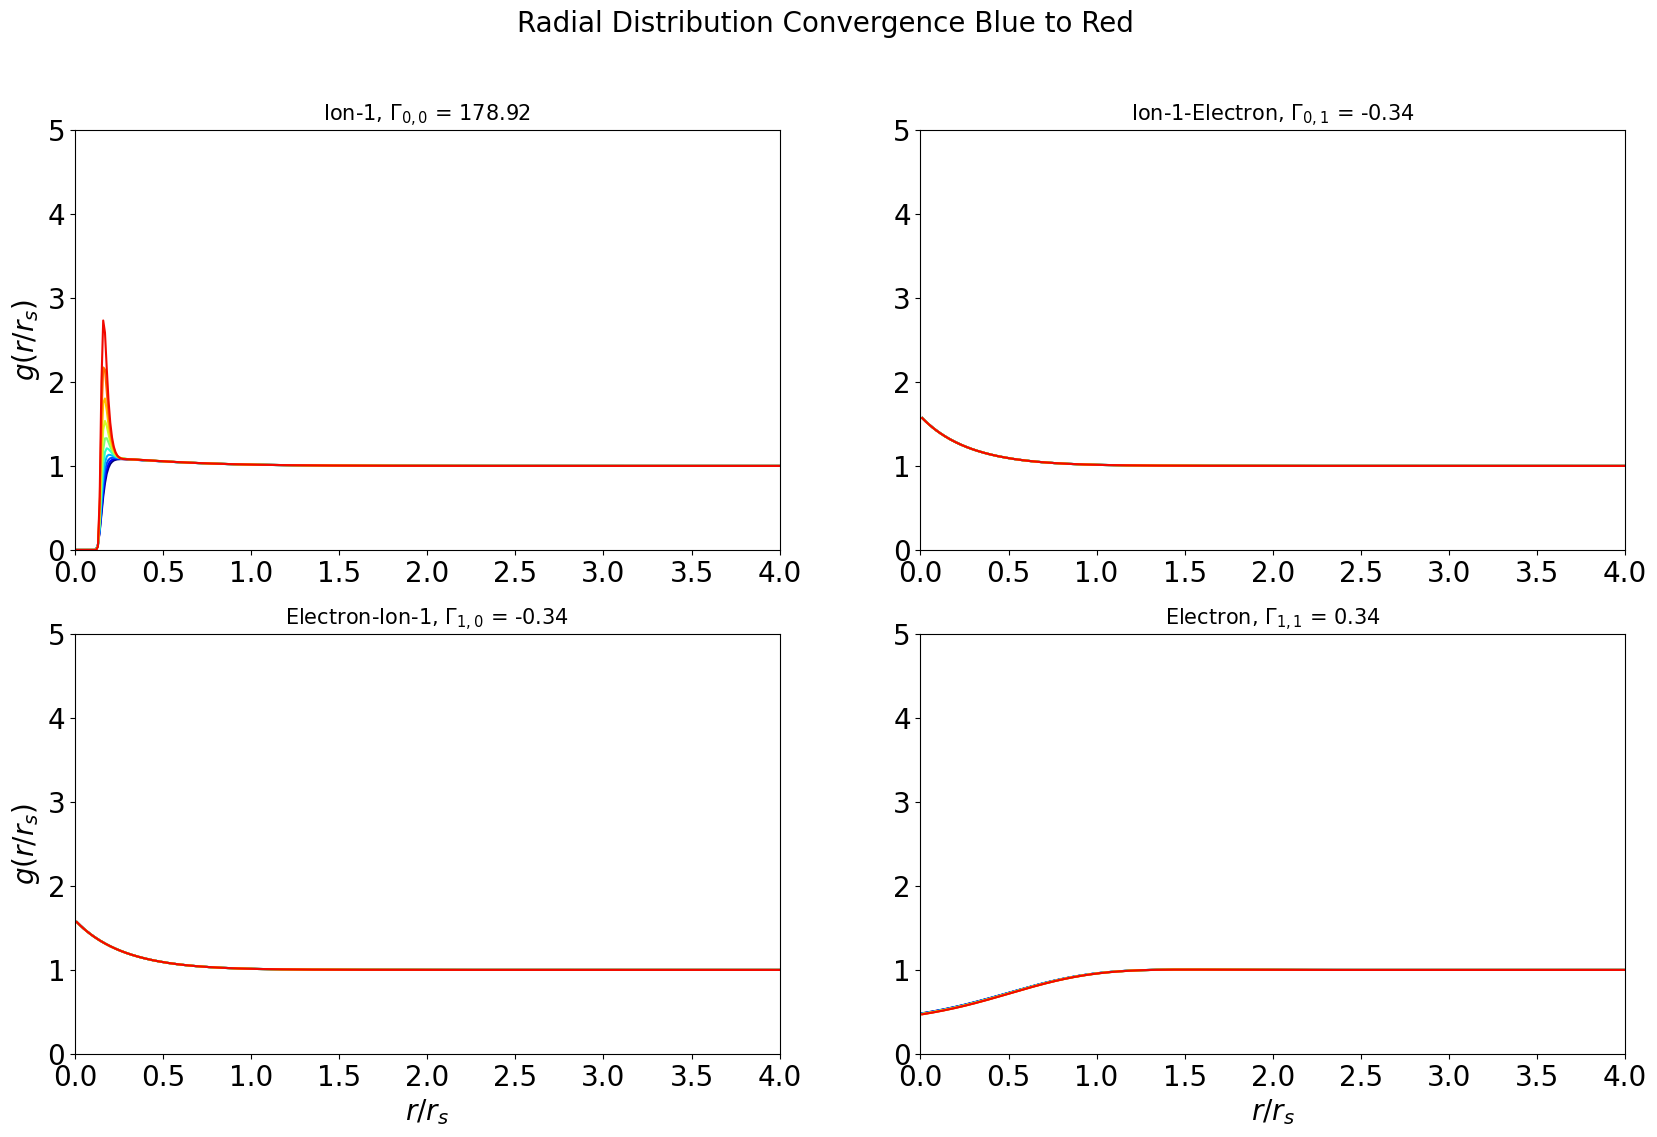

In [59]:
hydrogen_DW.plot_species_convergence_g(n_slices= int(len(hydrogen_DW.h_list)/1)  )

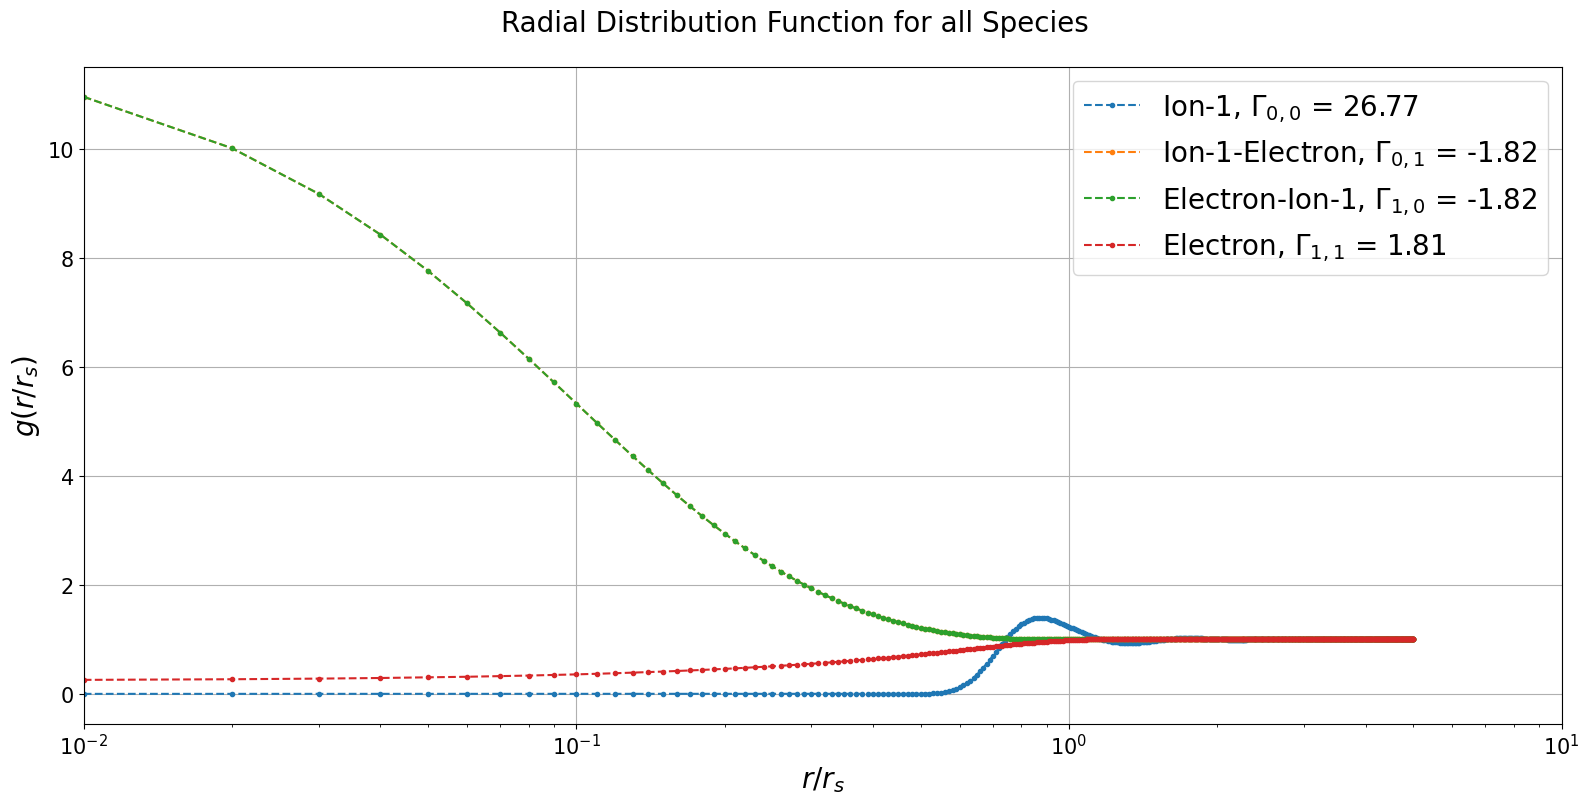

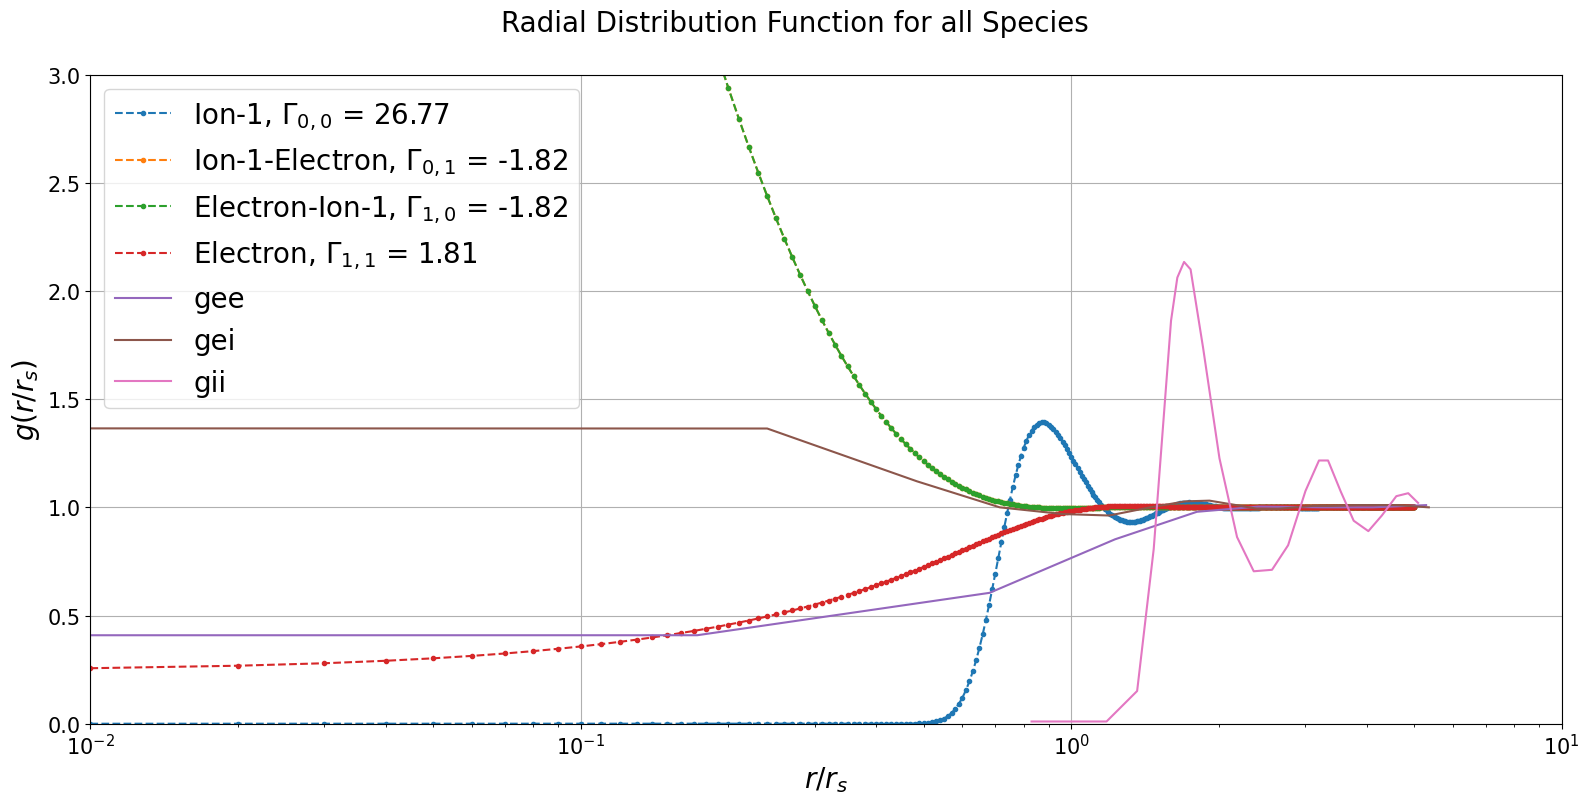

In [40]:
hydrogen_DW.plot_g_all_species()
hydrogen_DW.plot_g_all_species(gmax=3,data_to_compare=data_files, data_names=labels)


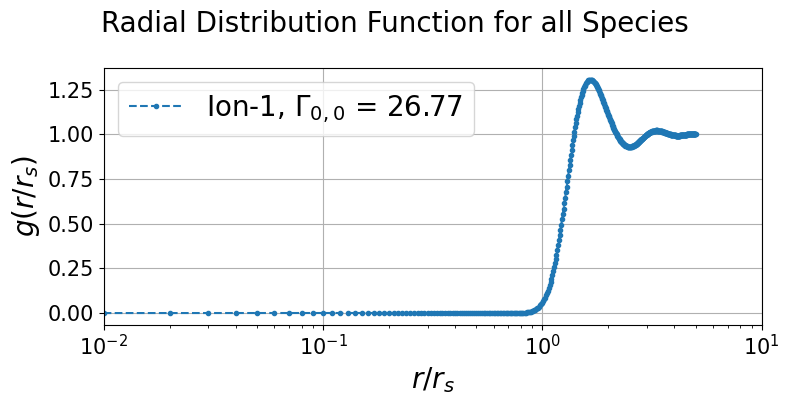

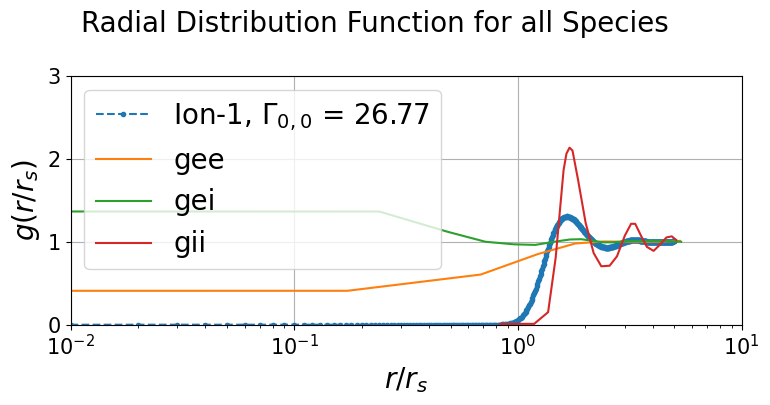

In [39]:
hydrogen_DW_one_species.plot_g_all_species()
hydrogen_DW_one_species.plot_g_all_species(gmax=3,data_to_compare=data_files, data_names=labels)
